In [1]:
import pandas as pd #Import required libraries
import math
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv('telecom_customer_churn.csv') #Read data
pd.set_option('display.max_columns', None)

df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
df.describe() #statistical summary of numerical data

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [4]:
df.describe(include = 'object') #statistical summary of categorical data

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,7043,7043,7043,7043,7043,7043,6361,7043,5517,5517,5517,5517,5517,5517,5517,5517,5517,7043,7043,7043,7043,1869,1869
unique,7043,2,2,1106,6,2,2,2,3,2,2,2,2,2,2,2,2,3,2,3,3,5,20
top,0002-ORFBO,Male,No,Los Angeles,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,1,3555,3641,293,3877,6361,3390,5517,3035,3498,3088,3095,3473,2810,2785,3029,4745,3610,4171,3909,4720,841,313


In [5]:
df.info() #total 38 features where "Customer churn status" status is our target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
print(df.isna().sum()) #14 out of 38 features have null values

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64


Text(0, 0.5, 'Total Customers')

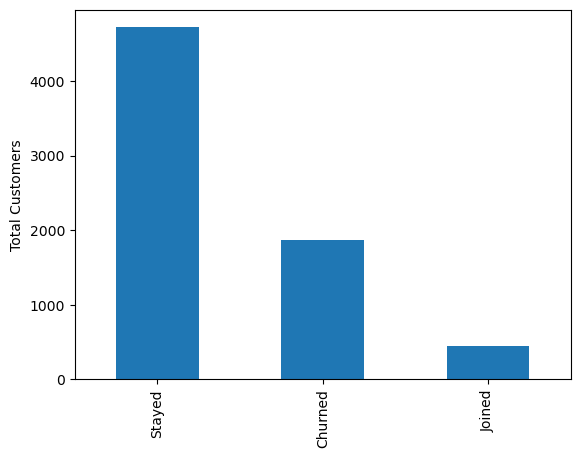

In [7]:
print(df['Customer Status'].value_counts()) #Data is unbalanced
df['Customer Status'].value_counts().plot(kind ='bar')
plt.ylabel("Total Customers")

In [8]:
#Churn_Rate = total_churned/Total Customers at the Start of Q2 2022

total_customer = df['Customer Status'].count()
print(total_customer)
total_churned= df[df['Customer Status']=='Churned']['Customer Status'].count()
print(total_churned)
Churn_Rate = (total_churned/total_customer)*100
print('Churn rate is', Churn_Rate) #Churn rate is very high. 26.53%

7043
1869
Churn rate is 26.536987079369588


In [9]:
df = df.drop(['Customer ID','City','Zip Code','Latitude','Longitude'], axis = 1) # these are not relevent for our Analysis

In [10]:
df['Customer Status'].value_counts() #Distributiong of data by Customer Status

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [11]:
df = df[df['Customer Status']!='Joined']# our purpose is to the find customer churn, so joined data is not relevent for our Analysis

df['Customer Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Refunds'}>],
       [<Axes: title={'center': 'Total Extra Data Charges'}>,
        <Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>]], dtype=object)

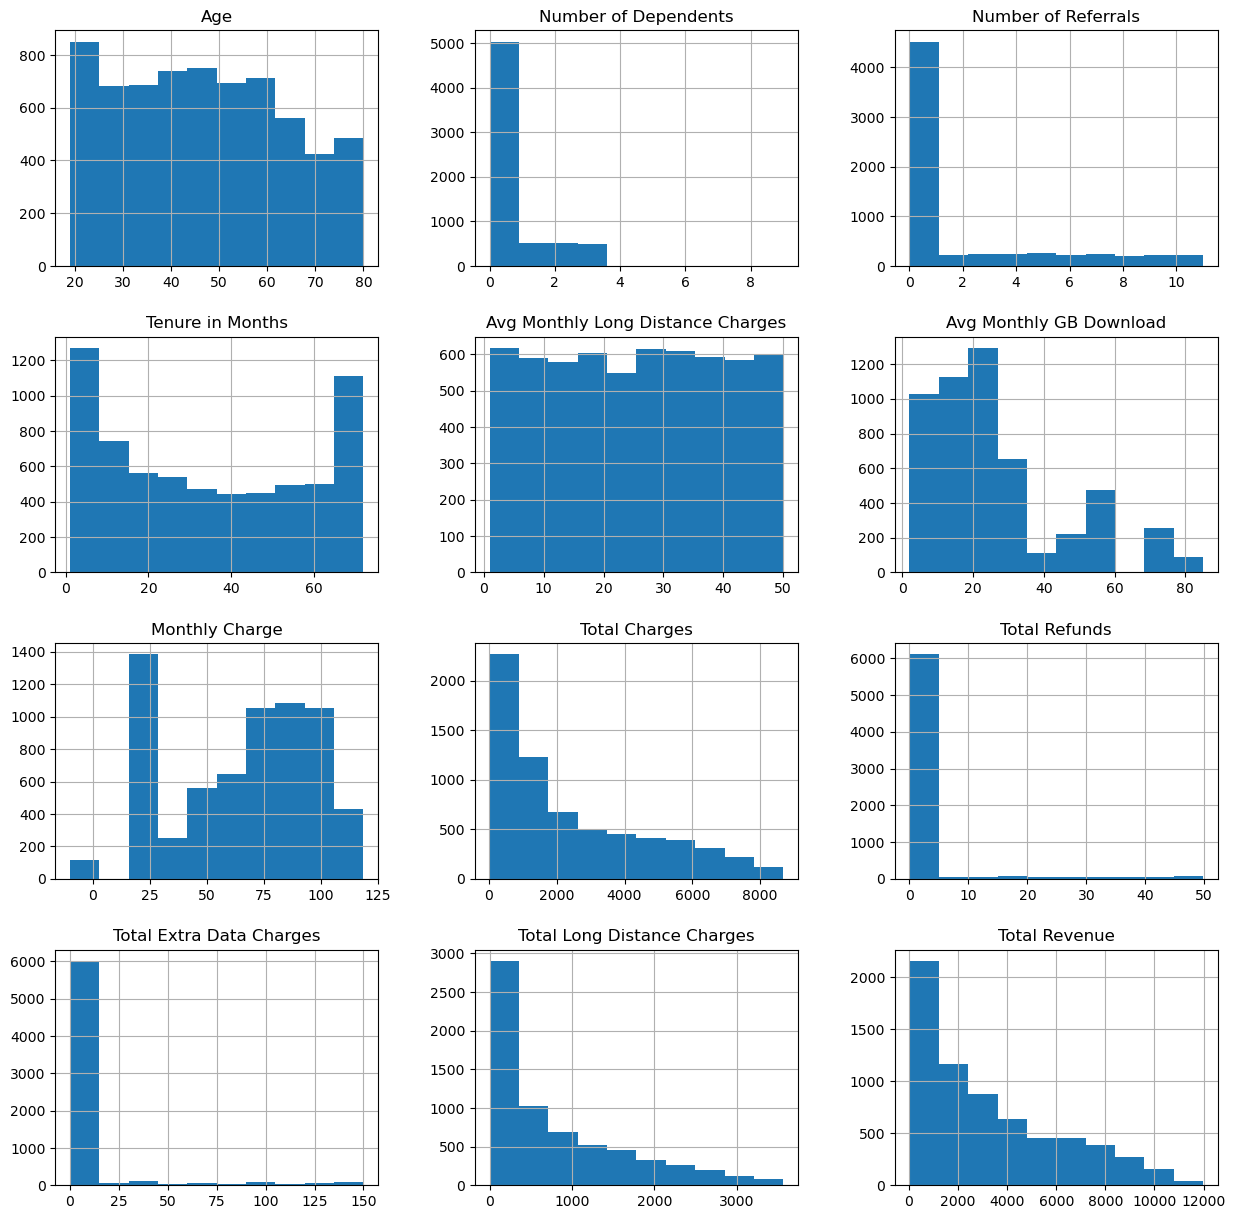

In [12]:
df.hist(figsize=(15,15))#overall distribution of  numerical features


In [13]:
df['year_tenure'] = df['Tenure in Months']//12 #converted tenure year into years, which was given in months and added new variable
                                            #'year_tenure'It can give more clear picture on yearly basis.
df['year_tenure'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6589 entries, 0 to 7042
Series name: year_tenure
Non-Null Count  Dtype
--------------  -----
6589 non-null   int64
dtypes: int64(1)
memory usage: 103.0 KB


In [14]:
bins = [0, 20, 40, 60, 100] # converted age group to bins
labels = ['0-20','20-40','40-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins, labels = labels)
df['Age Group'].head()

0    20-40
1    40-60
2    40-60
3      60+
4      60+
Name: Age Group, dtype: category
Categories (4, object): ['0-20' < '20-40' < '40-60' < '60+']

In [15]:
df['Age Group'].info() #Age Group dtype is category

<class 'pandas.core.series.Series'>
Int64Index: 6589 entries, 0 to 7042
Series name: Age Group
Non-Null Count  Dtype   
--------------  -----   
6589 non-null   category
dtypes: category(1)
memory usage: 58.1 KB


In [16]:
df['Age Group'] = df['Age Group'].astype('object') #converted dtype of Age group to object


In [17]:
num_col = df.select_dtypes(np.number).columns.to_list() #Numerical columns
cat_col = df.select_dtypes(include = [ 'object']).columns.to_list() #categorical columns

In [18]:
print("Numerical columns", num_col)
print("Categorical columns", cat_col)

Numerical columns ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'year_tenure']
Categorical columns ['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason', 'Age Group']


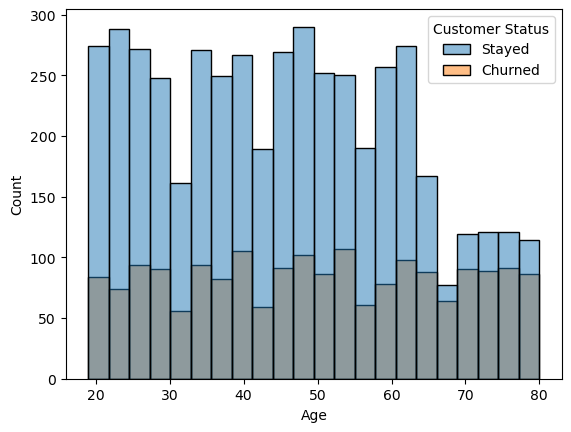

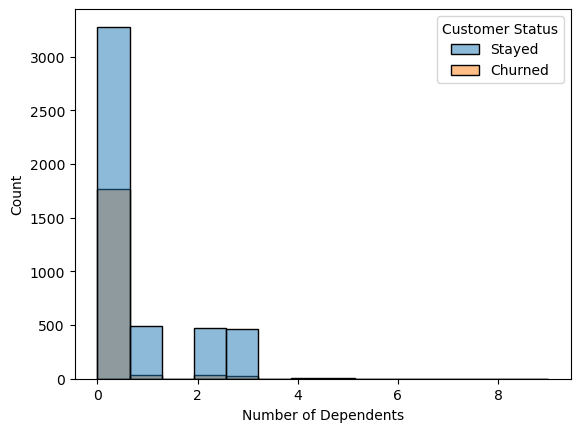

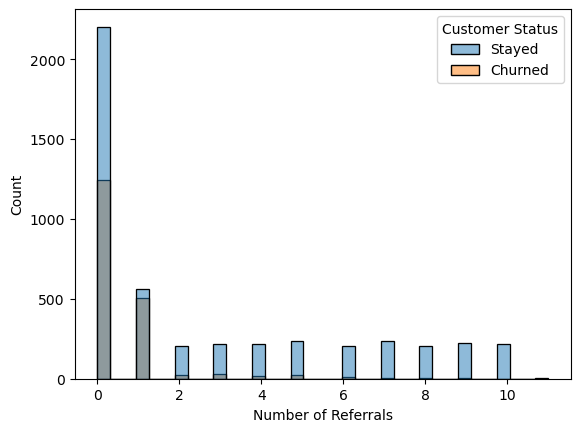

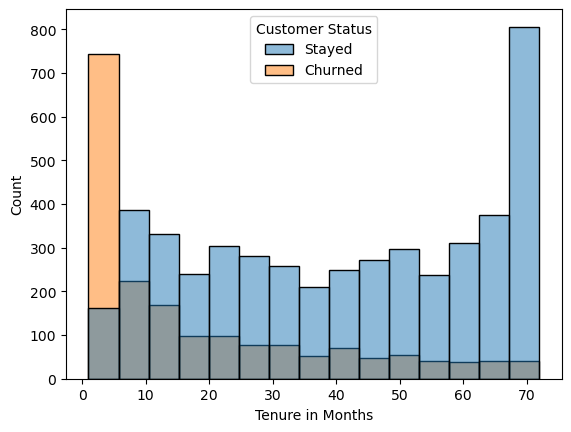

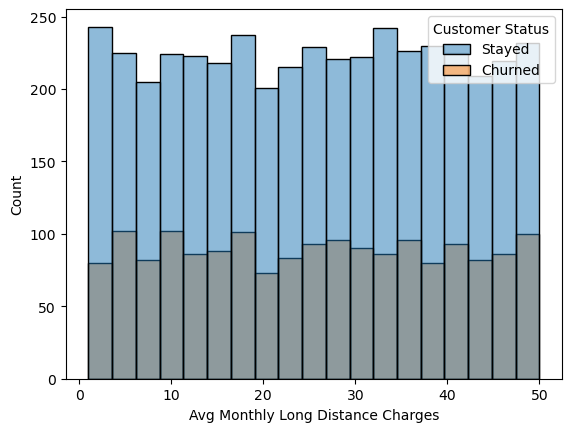

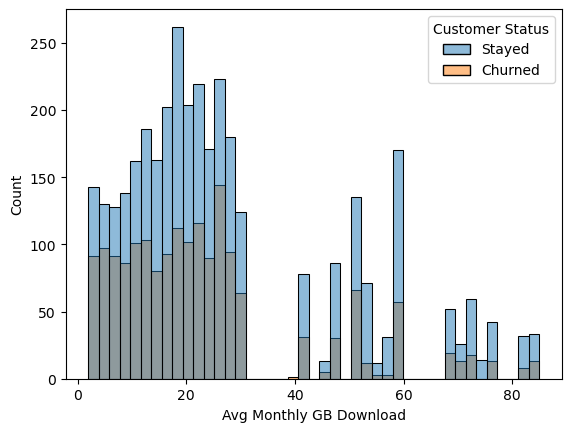

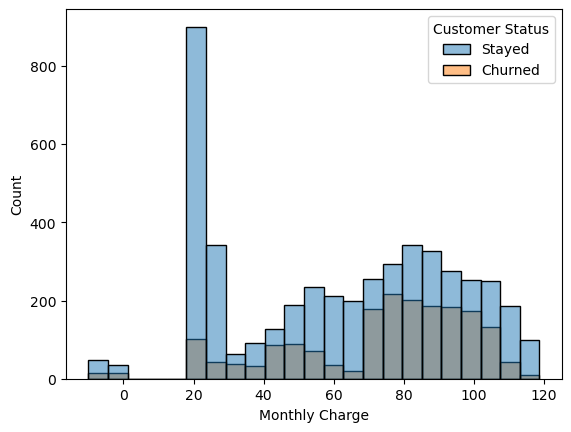

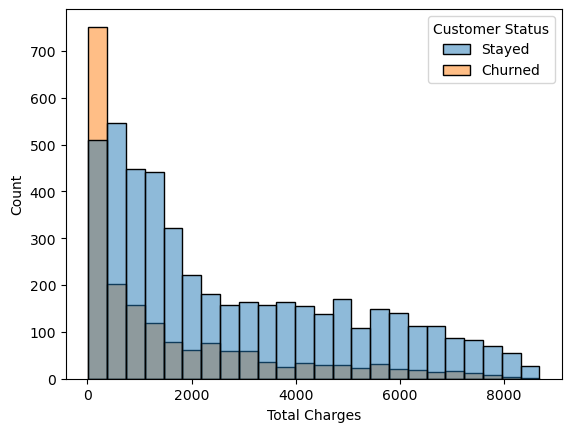

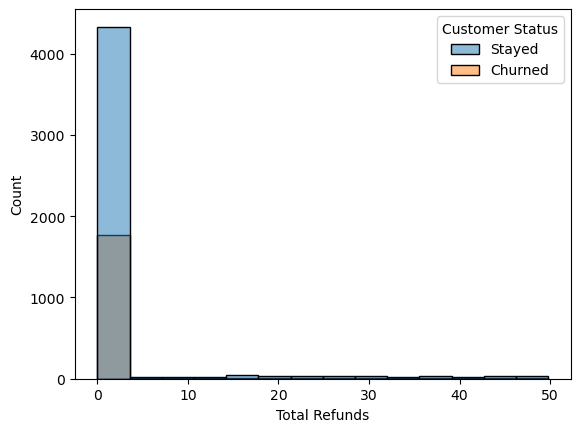

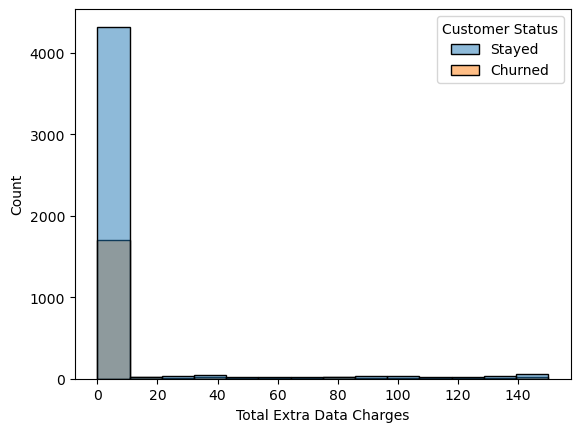

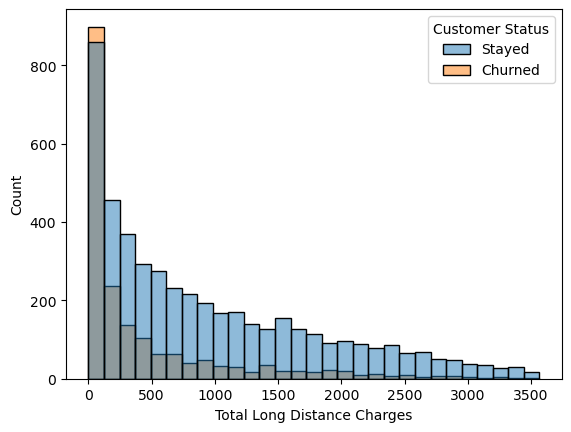

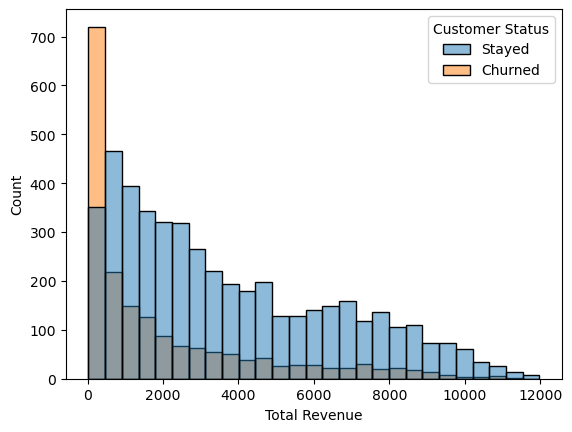

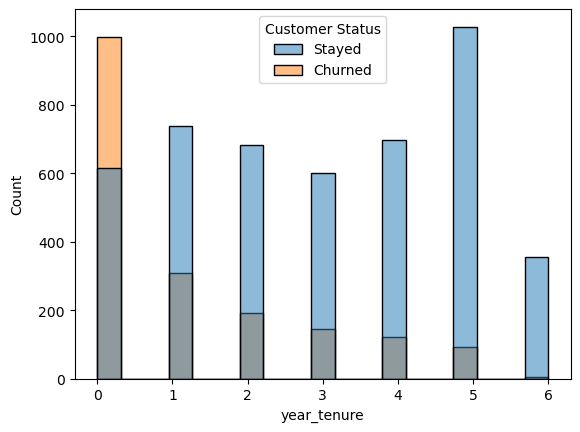

In [19]:
for col in num_col: #distribution of numerical features w.r.t Churn Status
    sns.histplot (x =col, hue = 'Customer Status', data = df)
    plt.show()

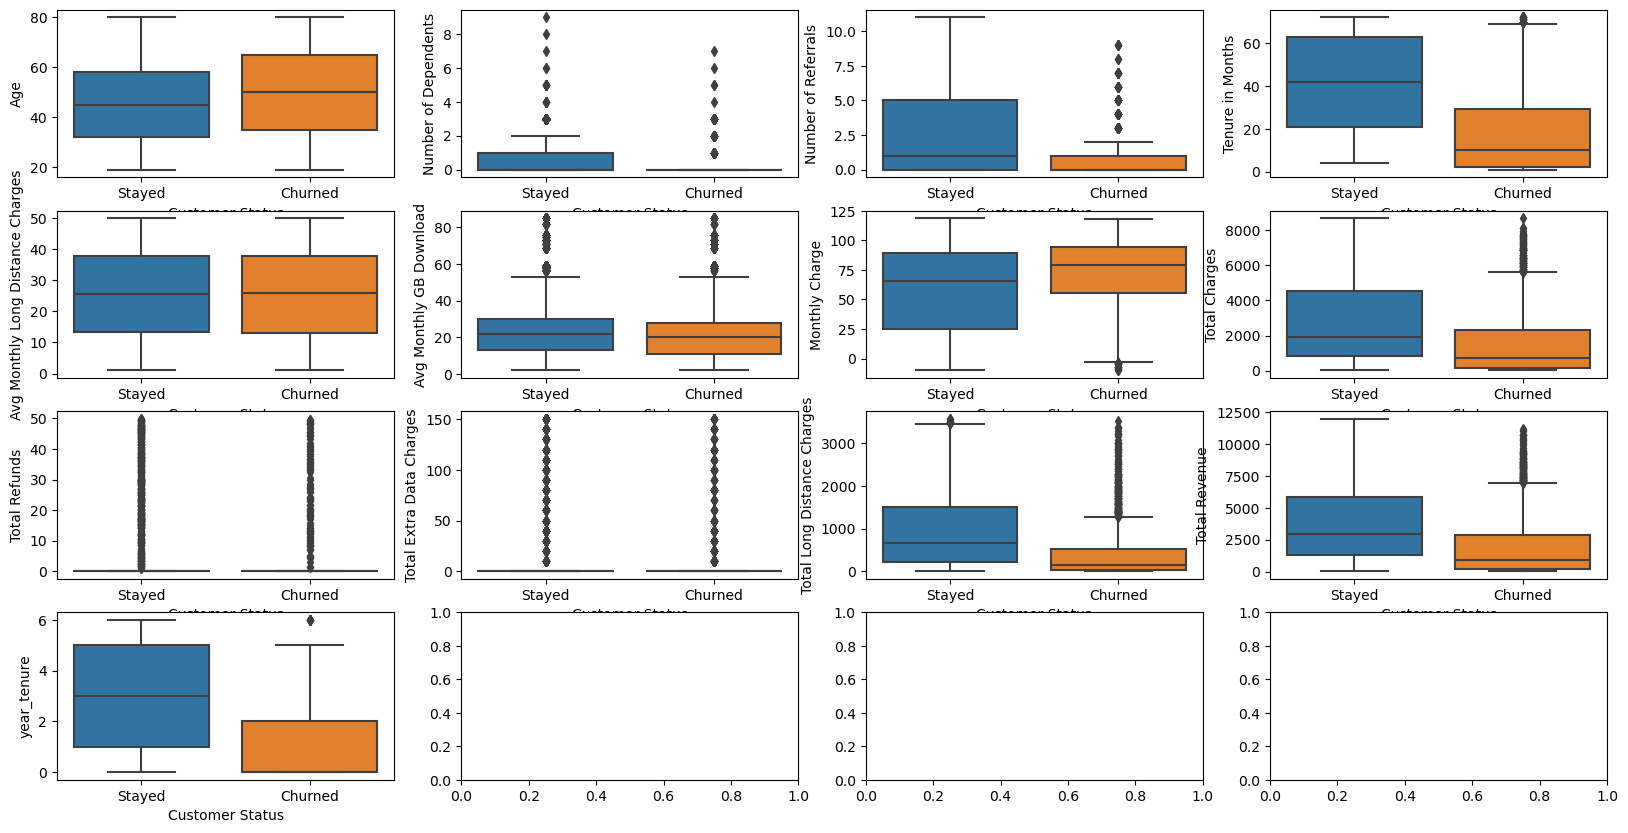

In [20]:
#Analysing numeric features by boxplots w.r.t Churn Status
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (20,10))
ax = ax.flatten()
count= 0
for col in num_col:
    sns.boxplot(y = col, x = 'Customer Status', data = df, ax = ax[count])
    count= count +1

In [21]:
num_ = ['year_tenure', 'Number of Referrals','Number of Dependents'] #discrete variables list

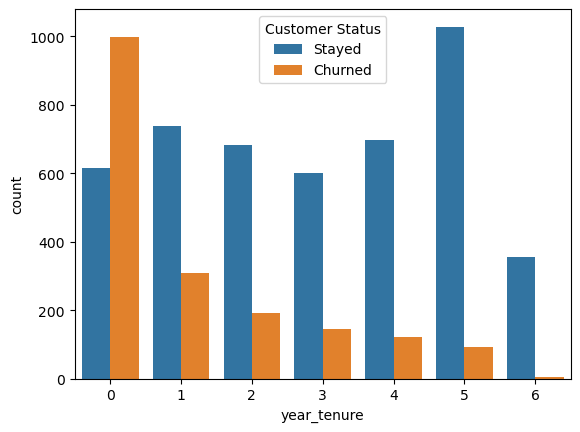

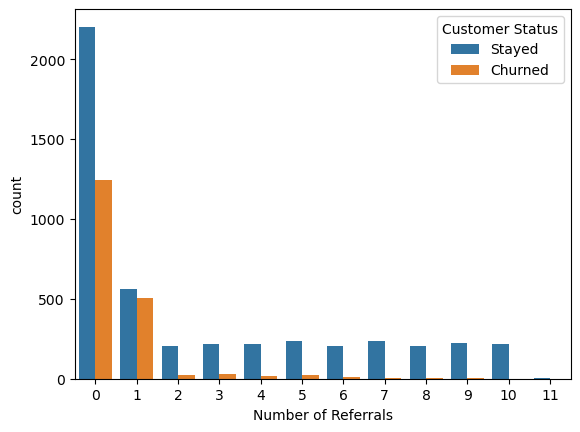

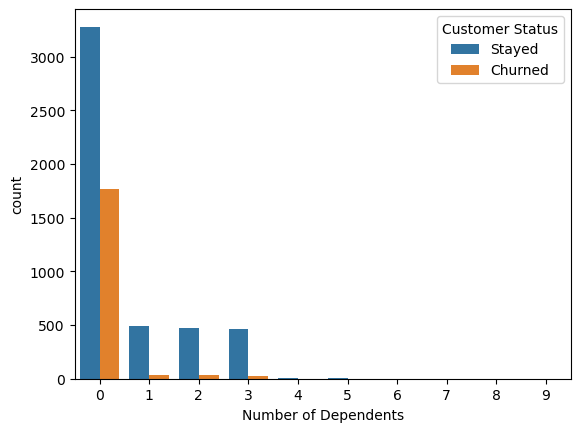

In [22]:
for col in num_: #Analysing discrete variables by countplot w.r.t Customer Status
   
    sns.countplot(x = col, hue = 'Customer Status', data = df)
    plt.show()

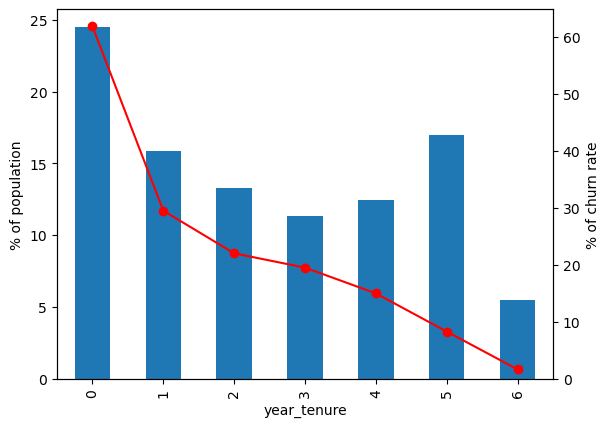

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
year_tenure                                                    
0                    999     616   61.857585  1615.0  24.510548
1                    309     738   29.512894  1047.0  15.890120
2                    193     683   22.031963   876.0  13.294885
3                    146     602   19.518717   748.0  11.352254
4                    123     697   15.000000   820.0  12.444984
5                     93    1028    8.296164  1121.0  17.013204
6                      6     356    1.657459   362.0   5.494005


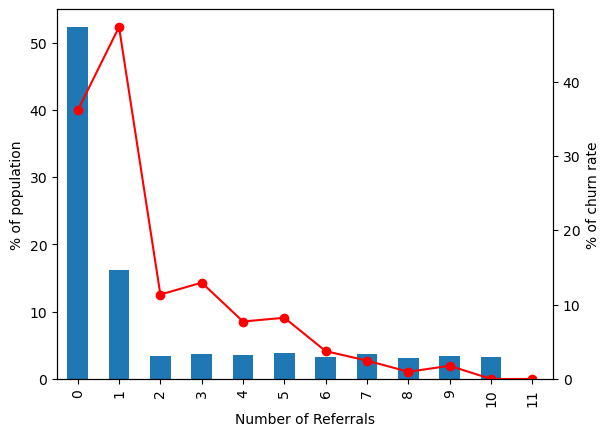

Customer Status      Churned  Stayed  Churn_rate   Total     Total%
Number of Referrals                                                
0                       1245    2203   36.107889  3448.0  52.329640
1                        507     564   47.338936  1071.0  16.254363
2                         26     203   11.353712   229.0   3.475489
3                         32     215   12.955466   247.0   3.748672
4                         18     215    7.725322   233.0   3.536197
5                         21     234    8.235294   255.0   3.870087
6                          8     206    3.738318   214.0   3.247837
7                          6     237    2.469136   243.0   3.687965
8                          2     204    0.970874   206.0   3.126423
9                          4     222    1.769912   226.0   3.429959
10                         0     215    0.000000   215.0   3.263014
11                         0       2    0.000000     2.0   0.030354


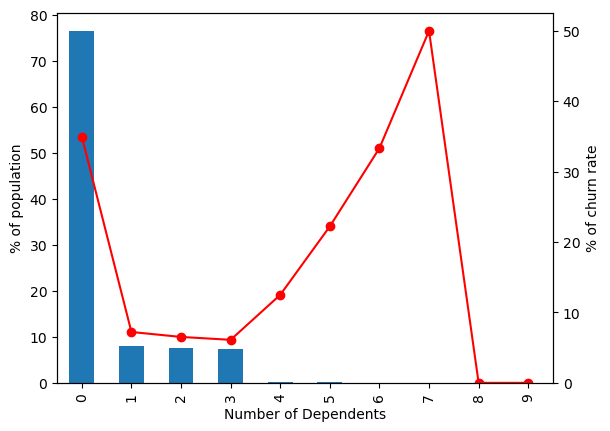

Customer Status       Churned  Stayed  Churn_rate   Total     Total%
Number of Dependents                                                
0                        1763    3279   34.966283  5042.0  76.521475
1                          38     488    7.224335   526.0   7.983002
2                          33     473    6.521739   506.0   7.679466
3                          30     461    6.109980   491.0   7.451814
4                           1       7   12.500000     8.0   0.121414
5                           2       7   22.222222     9.0   0.136591
6                           1       2   33.333333     3.0   0.045530
7                           1       1   50.000000     2.0   0.030354
8                           0       1    0.000000     1.0   0.015177
9                           0       1    0.000000     1.0   0.015177


In [23]:
for col in num_: #Analysing churn rate in overall population for discrete variables
    x =pd.crosstab(df[col], df['Customer Status']) 
    x['Churn_rate'] = (x.values[:,0] /(x.values[:,0]+x.values[:,1]))*100
    x['Total'] = x.values[:,0]+x.values[:,1]
    x['Total%'] = (x.Total/sum(x.Total))*100
    
    fig, ax = plt.subplots()
    x['Total%'].plot(kind='bar')
    plt.xlabel(f'{col}')
    plt.ylabel("% of population")
    ax.set_ylim(ymin=0)
    ax2 = ax.twinx()
    x['Churn_rate'].plot(kind='line', color = 'red', marker = 'o')
    plt.ylabel("% of churn rate")
    ax2.set_ylim(ymin = 0)
    plt.show()
    print(x)

Customer Status  Churned  Stayed
Gender                          
Female               939    2338
Male                 930    2382


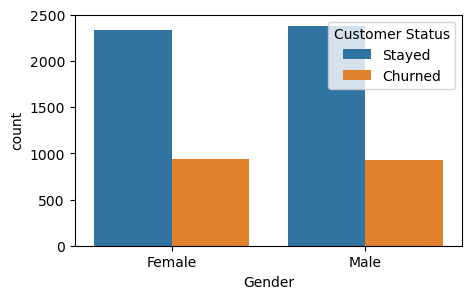

Customer Status  Churned  Stayed
Married                         
No                  1200    2071
Yes                  669    2649


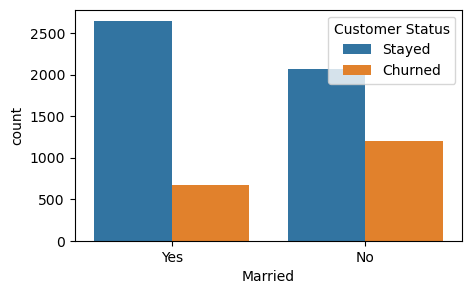

Customer Status  Churned  Stayed
Offer                           
None                1051    2547
Offer A               35     485
Offer B              101     723
Offer C               95     320
Offer D              161     441
Offer E              426     204


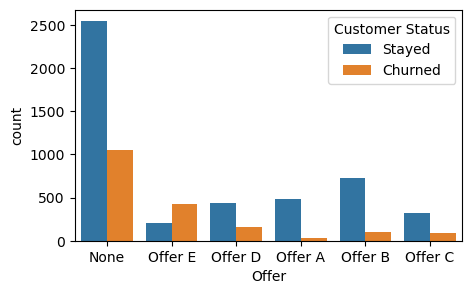

Customer Status  Churned  Stayed
Phone Service                   
No                   170     474
Yes                 1699    4246


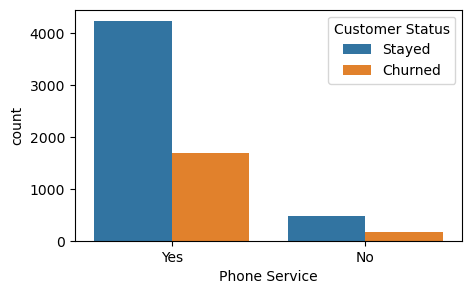

Customer Status  Churned  Stayed
Multiple Lines                  
No                   849    2170
Yes                  850    2076


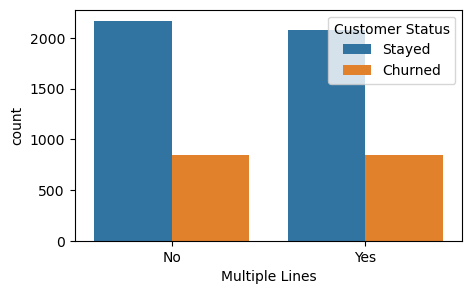

Customer Status   Churned  Stayed
Internet Service                 
No                    113    1231
Yes                  1756    3489


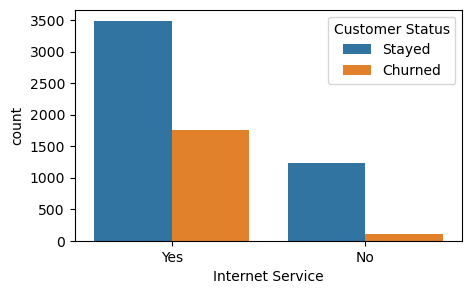

Customer Status  Churned  Stayed
Internet Type                   
Cable                213     561
DSL                  307    1230
Fiber Optic         1236    1698


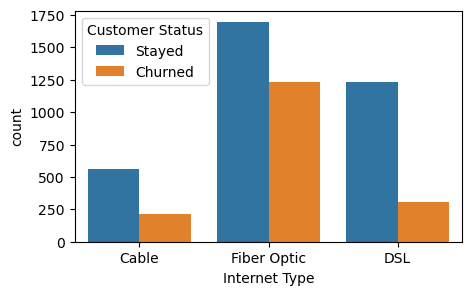

Customer Status  Churned  Stayed
Online Security                 
No                  1461    1811
Yes                  295    1678


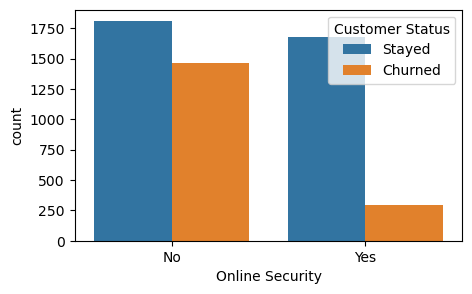

Customer Status  Churned  Stayed
Online Backup                   
No                  1233    1637
Yes                  523    1852


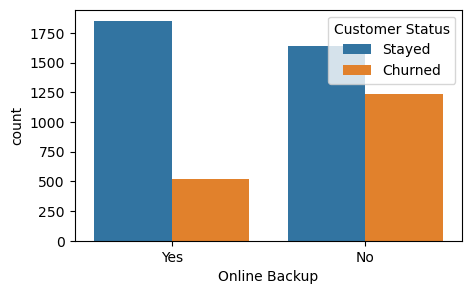

Customer Status         Churned  Stayed
Device Protection Plan                 
No                         1211    1644
Yes                         545    1845


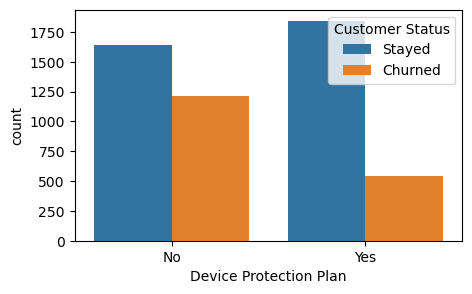

Customer Status       Churned  Stayed
Premium Tech Support                 
No                       1446    1802
Yes                       310    1687


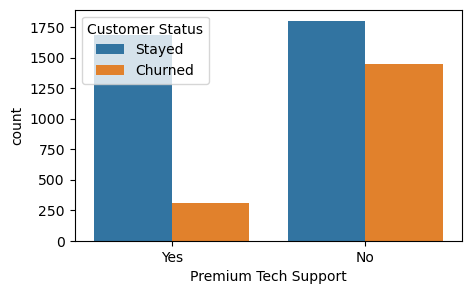

Customer Status  Churned  Stayed
Streaming TV                    
No                   942    1645
Yes                  814    1844


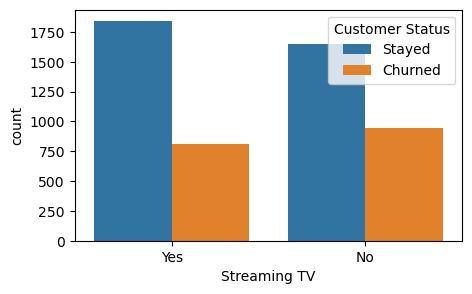

Customer Status   Churned  Stayed
Streaming Movies                 
No                    938    1624
Yes                   818    1865


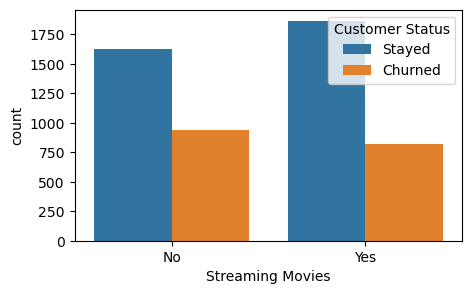

Customer Status  Churned  Stayed
Streaming Music                 
No                  1028    1781
Yes                  728    1708


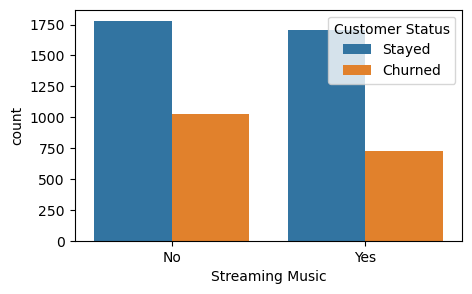

Customer Status  Churned  Stayed
Unlimited Data                  
No                   254     470
Yes                 1502    3019


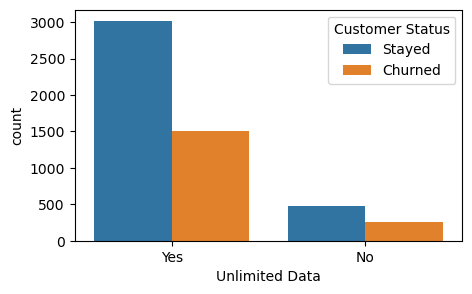

Customer Status  Churned  Stayed
Contract                        
Month-to-Month      1655    1547
One Year             166    1360
Two Year              48    1813


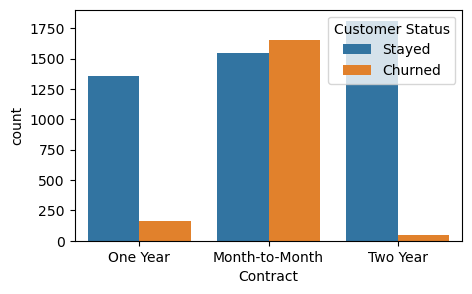

Customer Status    Churned  Stayed
Paperless Billing                 
No                     469    2146
Yes                   1400    2574


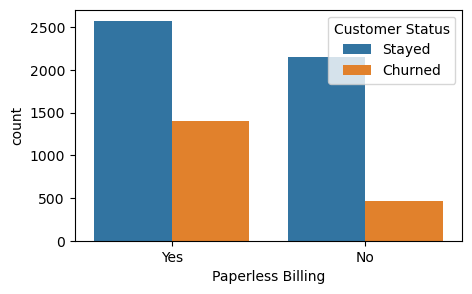

Customer Status  Churned  Stayed
Payment Method                  
Bank Withdrawal     1329    2399
Credit Card          398    2120
Mailed Check         142     201


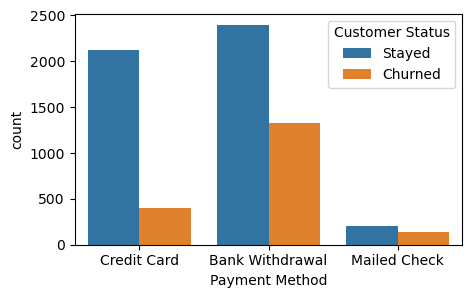

Customer Status  Churned  Stayed
Customer Status                 
Churned             1869       0
Stayed                 0    4720


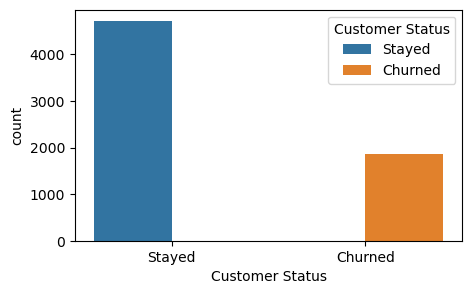

Customer Status  Churned
Churn Category          
Attitude             314
Competitor           841
Dissatisfaction      321
Other                182
Price                211


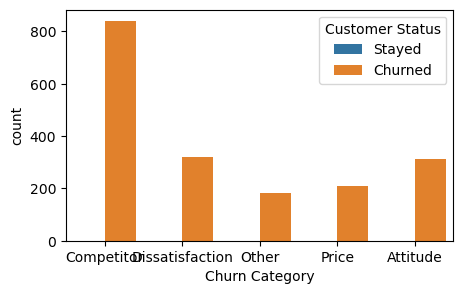

Customer Status                            Churned
Churn Reason                                      
Attitude of service provider                    94
Attitude of support person                     220
Competitor had better devices                  313
Competitor made better offer                   311
Competitor offered higher download speeds      100
Competitor offered more data                   117
Deceased                                         6
Don't know                                     130
Extra data charges                              39
Lack of affordable download/upload speed        30
Lack of self-service on Website                 29
Limited range of services                       37
Long distance charges                           64
Moved                                           46
Network reliability                             72
Poor expertise of online support                31
Poor expertise of phone support                 12
Price too high                 

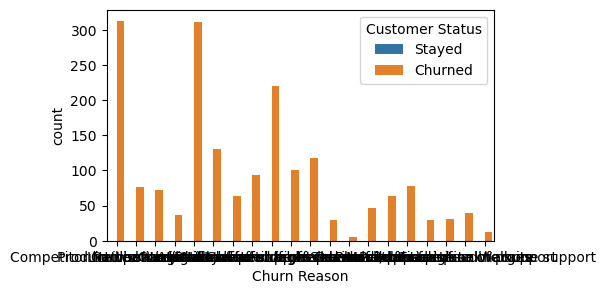

Customer Status  Churned  Stayed
Age Group                       
0-20                  48     182
20-40                597    1775
40-60                618    1770
60+                  606     993


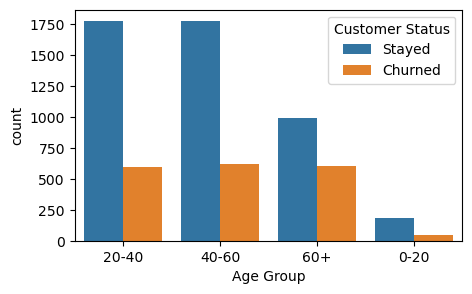

In [24]:
for col in cat_col: #features considered to remove-Paperless billing, Gender, Multiple lines, STreaming TV , Streaming movie, Streaming music
                    #imp feature - Contract,Payment method, Married , offer, internet service, internet type, online security,(online backup,Device protection plan, premium tech support)
                    #doubtfull feature -phone service
                    #These will be finalised after hypothesis tests
            
    plt.figure(figsize=(5,3))
    sns.countplot(x =col, hue = 'Customer Status' , data = df)
    print(pd.crosstab(df[col], df['Customer Status']))
    plt.show()

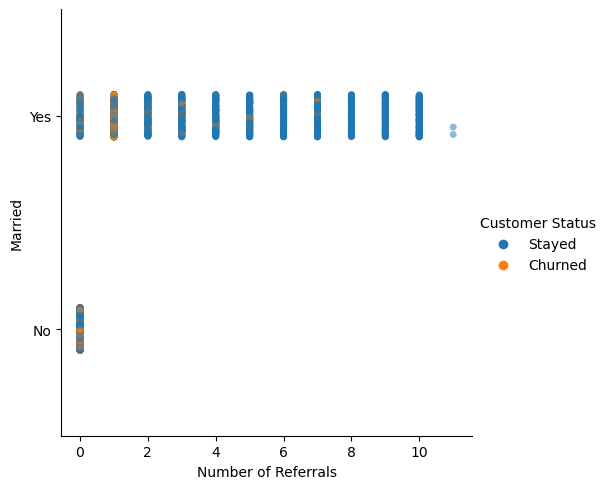

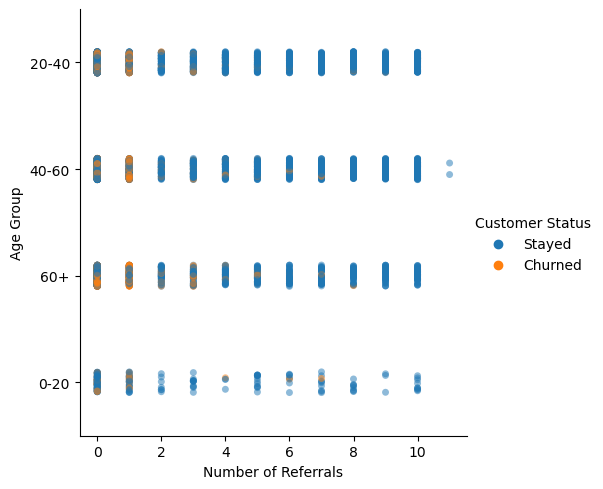

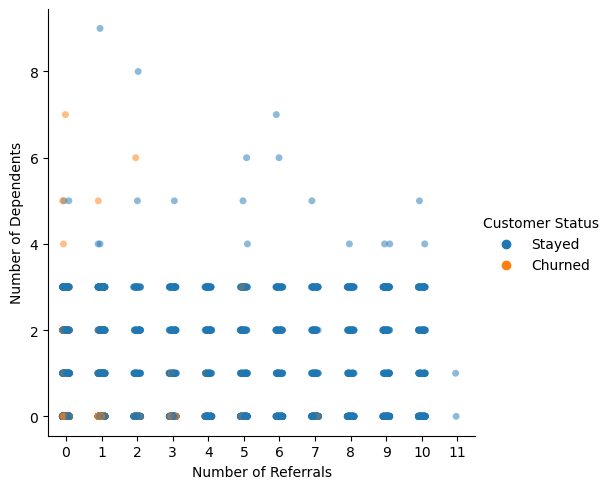

In [25]:
#Analysing referals by different group of Customers by catplot
ref = ['Married', 'Age Group', 'Number of Dependents'] # Only Married Customers refered.
for col in ref:
    sns.catplot(y=col, x="Number of Referrals", data=df,hue="Customer Status", alpha =0.5)

In [26]:
#cat_col
cat_col1 = ['Gender',
 'Married',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status', 'Age Group', 'year_tenure']
cat_col1 # removed customer reason and category. We will be analysing them separately

['Gender',
 'Married',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status',
 'Age Group',
 'year_tenure']

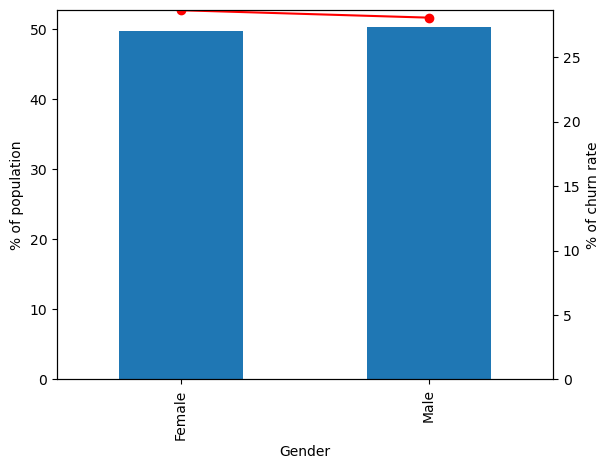

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Gender                                                         
Female               939    2338   28.654257  3277.0  49.734406
Male                 930    2382   28.079710  3312.0  50.265594


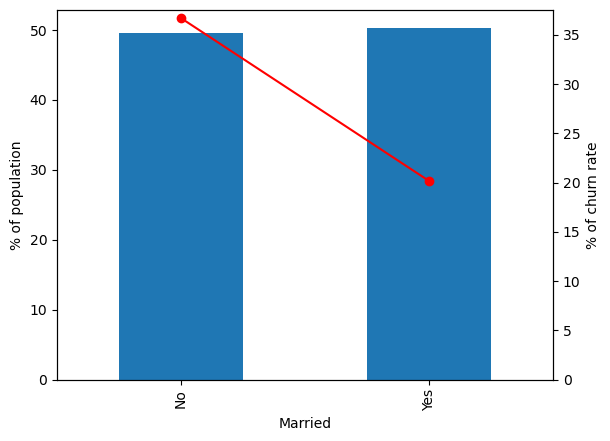

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Married                                                        
No                  1200    2071   36.686029  3271.0  49.643345
Yes                  669    2649   20.162749  3318.0  50.356655


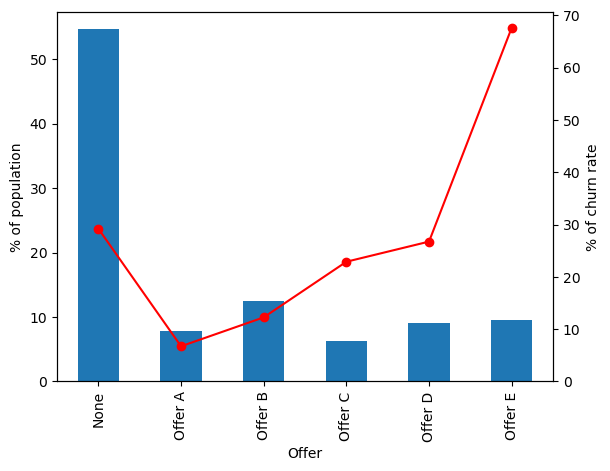

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Offer                                                          
None                1051    2547   29.210673  3598.0  54.606162
Offer A               35     485    6.730769   520.0   7.891941
Offer B              101     723   12.257282   824.0  12.505691
Offer C               95     320   22.891566   415.0   6.298376
Offer D              161     441   26.744186   602.0   9.136440
Offer E              426     204   67.619048   630.0   9.561390


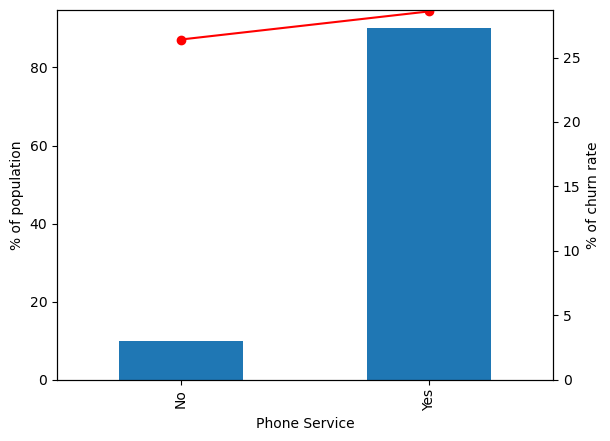

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Phone Service                                                  
No                   170     474   26.397516   644.0   9.773866
Yes                 1699    4246   28.578638  5945.0  90.226134


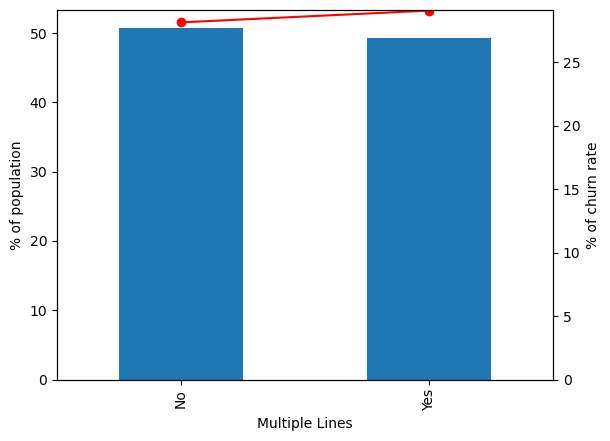

Customer Status  Churned  Stayed  Churn_rate   Total    Total%
Multiple Lines                                                
No                   849    2170   28.121895  3019.0  50.78217
Yes                  850    2076   29.049897  2926.0  49.21783


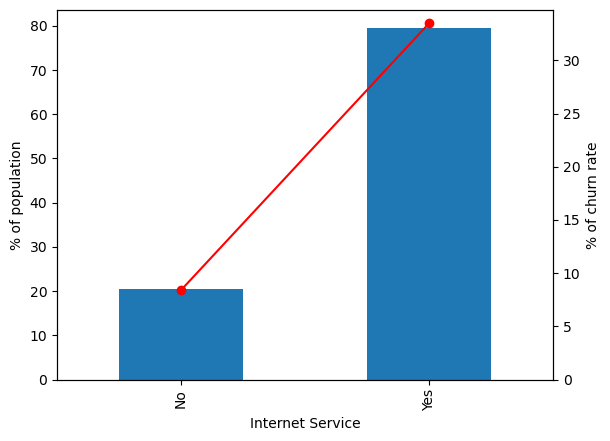

Customer Status   Churned  Stayed  Churn_rate   Total     Total%
Internet Service                                                
No                    113    1231    8.407738  1344.0  20.397632
Yes                  1756    3489   33.479504  5245.0  79.602368


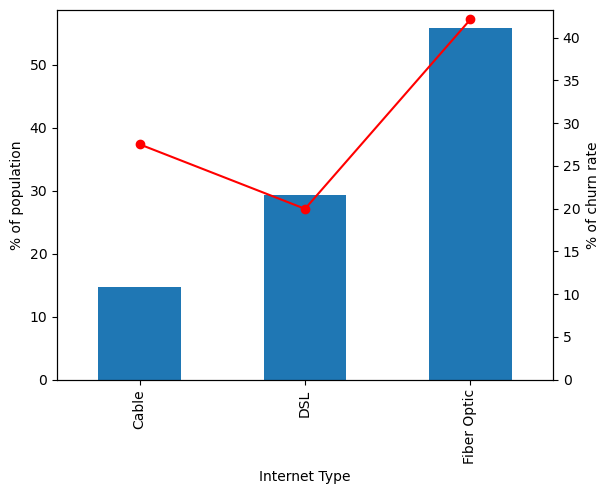

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Internet Type                                                  
Cable                213     561   27.519380   774.0  14.756911
DSL                  307    1230   19.973975  1537.0  29.304099
Fiber Optic         1236    1698   42.126789  2934.0  55.938990


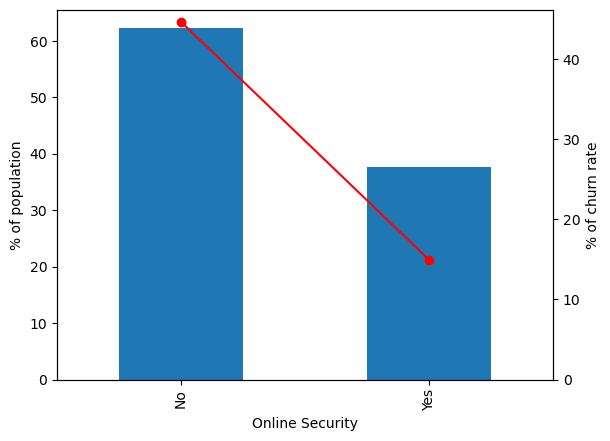

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Online Security                                                
No                  1461    1811   44.651589  3272.0  62.383222
Yes                  295    1678   14.951850  1973.0  37.616778


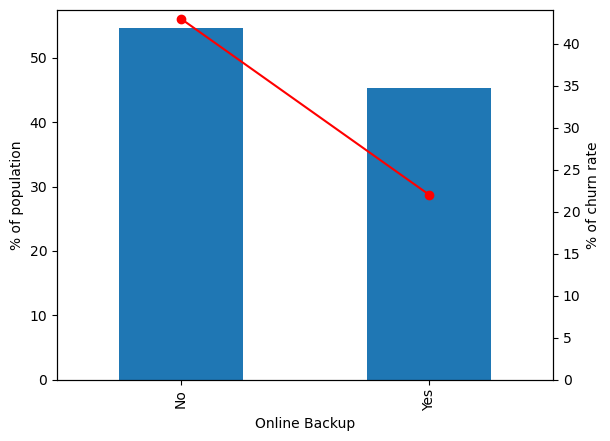

Customer Status  Churned  Stayed  Churn_rate   Total    Total%
Online Backup                                                 
No                  1233    1637   42.961672  2870.0  54.71878
Yes                  523    1852   22.021053  2375.0  45.28122


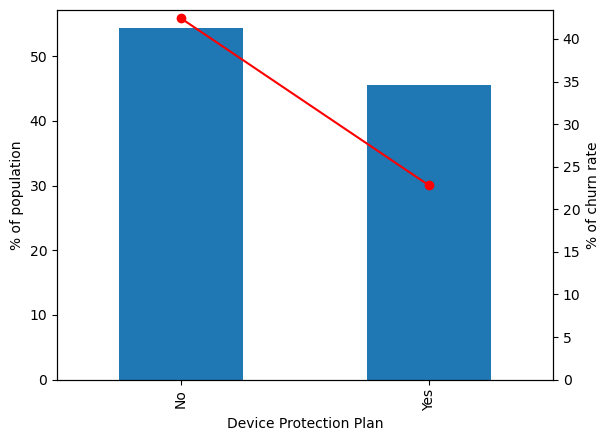

Customer Status         Churned  Stayed  Churn_rate   Total     Total%
Device Protection Plan                                                
No                         1211    1644   42.416813  2855.0  54.432793
Yes                         545    1845   22.803347  2390.0  45.567207


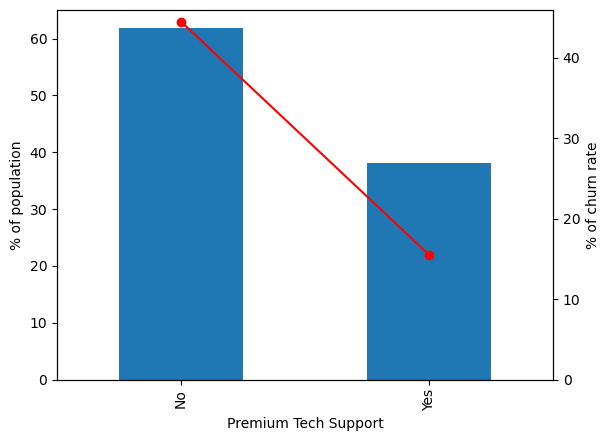

Customer Status       Churned  Stayed  Churn_rate   Total     Total%
Premium Tech Support                                                
No                       1446    1802   44.519704  3248.0  61.925643
Yes                       310    1687   15.523285  1997.0  38.074357


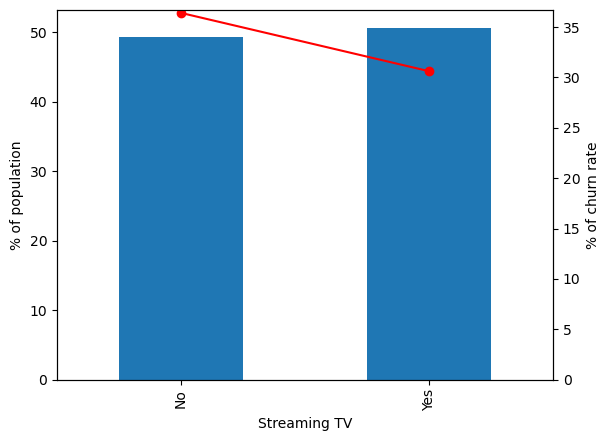

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Streaming TV                                                   
No                   942    1645   36.412833  2587.0  49.323165
Yes                  814    1844   30.624530  2658.0  50.676835


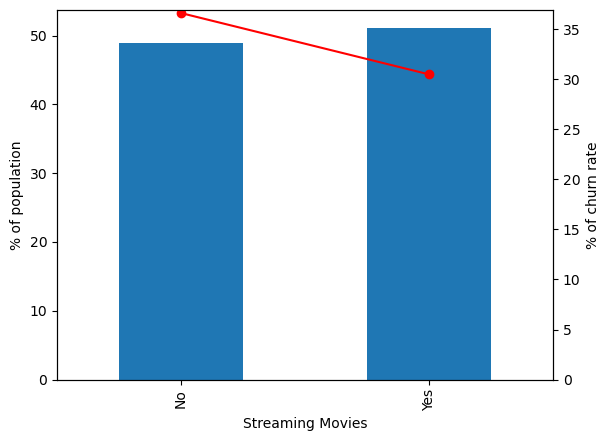

Customer Status   Churned  Stayed  Churn_rate   Total    Total%
Streaming Movies                                               
No                    938    1624   36.612022  2562.0  48.84652
Yes                   818    1865   30.488259  2683.0  51.15348


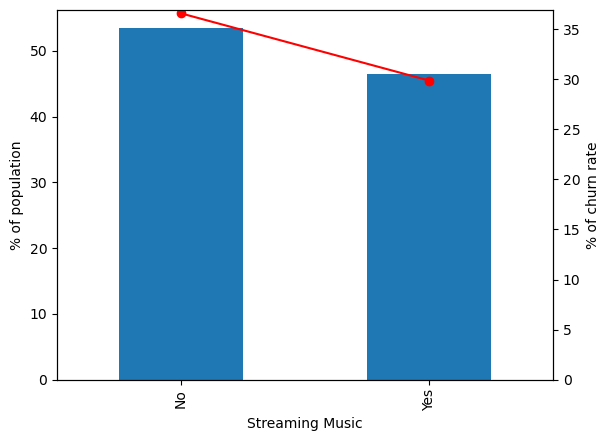

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Streaming Music                                                
No                  1028    1781   36.596654  2809.0  53.555767
Yes                  728    1708   29.885057  2436.0  46.444233


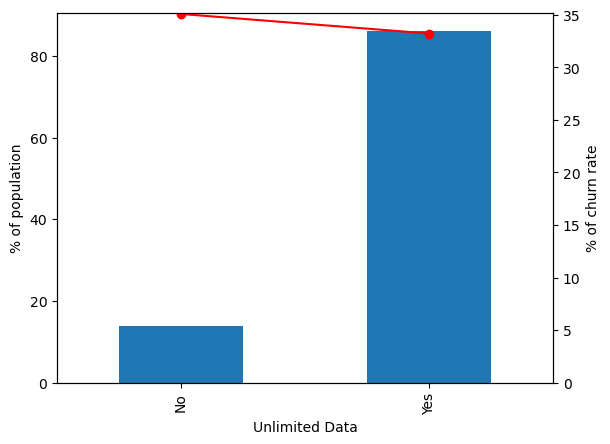

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Unlimited Data                                                 
No                   254     470   35.082873   724.0  13.803622
Yes                 1502    3019   33.222738  4521.0  86.196378


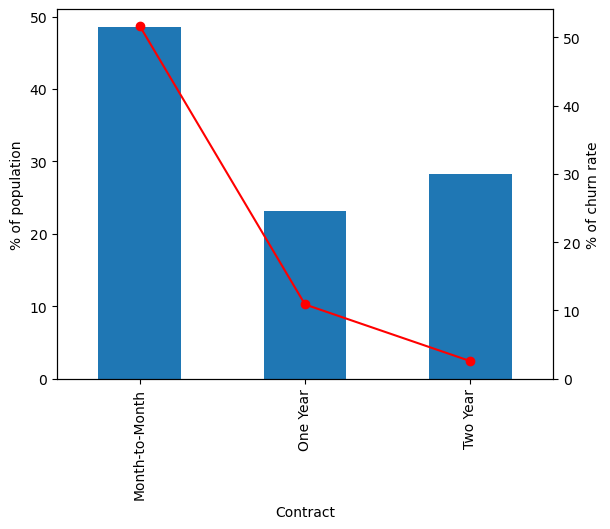

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Contract                                                       
Month-to-Month      1655    1547   51.686446  3202.0  48.596145
One Year             166    1360   10.878113  1526.0  23.159812
Two Year              48    1813    2.579258  1861.0  28.244043


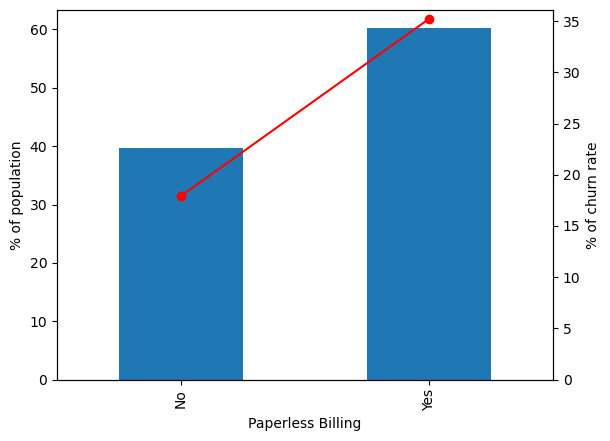

Customer Status    Churned  Stayed  Churn_rate   Total     Total%
Paperless Billing                                                
No                     469    2146   17.934990  2615.0  39.687358
Yes                   1400    2574   35.228988  3974.0  60.312642


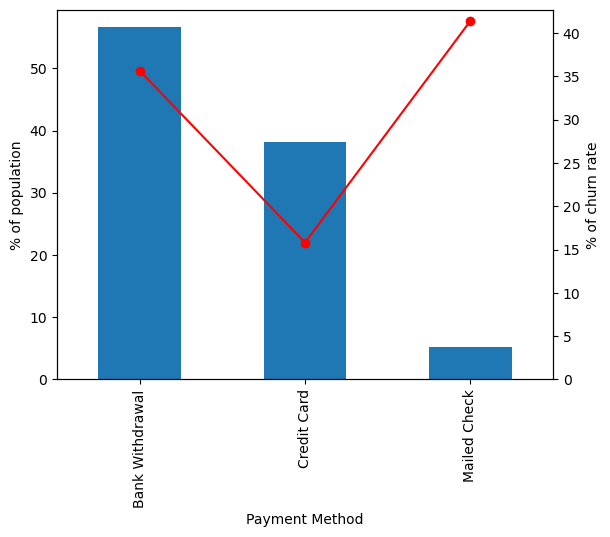

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Payment Method                                                 
Bank Withdrawal     1329    2399   35.649142  3728.0  56.579147
Credit Card          398    2120   15.806195  2518.0  38.215207
Mailed Check         142     201   41.399417   343.0   5.205646


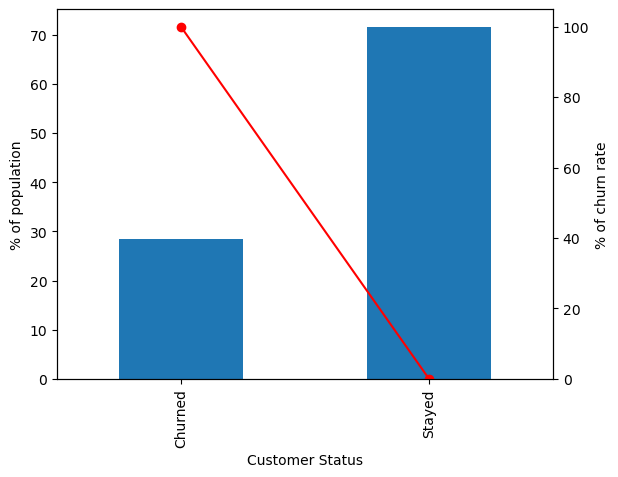

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Customer Status                                                
Churned             1869       0       100.0  1869.0  28.365458
Stayed                 0    4720         0.0  4720.0  71.634542


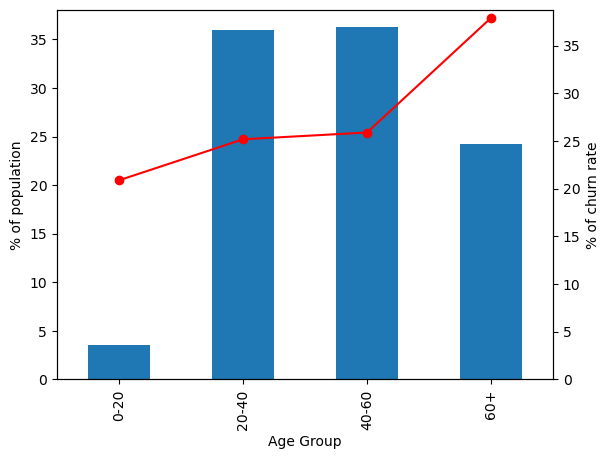

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
Age Group                                                      
0-20                  48     182   20.869565   230.0   3.490666
20-40                597    1775   25.168634  2372.0  35.999393
40-60                618    1770   25.879397  2388.0  36.242222
60+                  606     993   37.898687  1599.0  24.267719


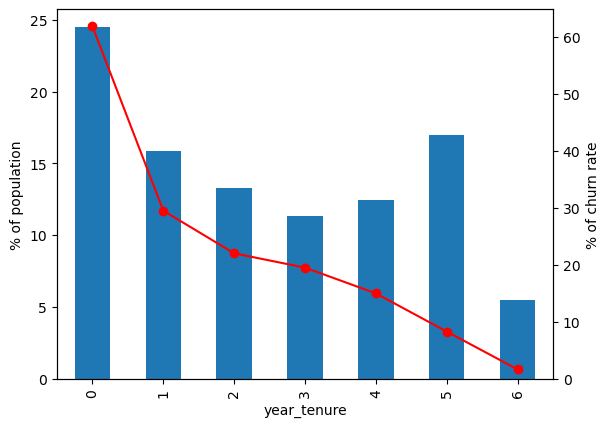

Customer Status  Churned  Stayed  Churn_rate   Total     Total%
year_tenure                                                    
0                    999     616   61.857585  1615.0  24.510548
1                    309     738   29.512894  1047.0  15.890120
2                    193     683   22.031963   876.0  13.294885
3                    146     602   19.518717   748.0  11.352254
4                    123     697   15.000000   820.0  12.444984
5                     93    1028    8.296164  1121.0  17.013204
6                      6     356    1.657459   362.0   5.494005


In [27]:
for col in cat_col1: #Analysing churn rate against overall population categorical Features
    x =pd.crosstab(df[col], df['Customer Status'])
    x['Churn_rate'] = (x.values[:,0] /(x.values[:,0]+x.values[:,1]))*100
    x['Total'] = x.values[:,0]+x.values[:,1]
    x['Total%'] = (x.Total/sum(x.Total))*100
    
    fig, ax = plt.subplots()
    x['Total%'].plot(kind='bar')
    plt.xlabel(f'{col}')
    plt.ylabel("% of population")
    ax.set_ylim(ymin=0)
    ax2 = ax.twinx()
    x['Churn_rate'].plot(kind='line', color = 'red', marker = 'o')
    plt.ylabel("% of churn rate")
    ax2.set_ylim(ymin = 0)
    plt.show()
    print(x)

In [28]:
#Churn rate is low for Married people
#high for Offer E and very low for A and B and None. Offer E Customer needs attention.
#Churn rate is low for who did not take Internet service

# here is high number of customer who are on Month-Month contrct and churning rate is high for them and least for those with 2 year
#and 1 year
# %population for Mailed check billing is very low but churning rate is very high and less for Credit card.

In [29]:
df[df['Payment Method']== 'Mailed Check']['Age Group'].value_counts() #it did no provide much insights information

40-60    138
20-40    130
60+       62
0-20      13
Name: Age Group, dtype: int64

<Axes: >

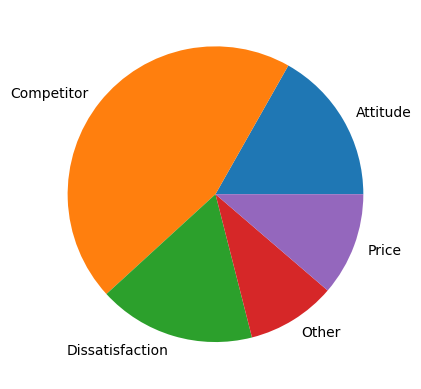

In [30]:
# Pie chart showing distribution of feedback provided by Customers , Competitor is highest

df.groupby('Churn Category').size().plot(kind='pie')

In [31]:
print(df['Churn Category'].value_counts())
print('Total customer',df['Churn Category'].count()) 



Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64
Total customer 1869


In [32]:
total = df['Churn Category'].count()


In [33]:
(df['Churn Category'].value_counts()/total * 100) #percentage of feedback who left the company

Competitor         44.997325
Dissatisfaction    17.174960
Attitude           16.800428
Price              11.289460
Other               9.737828
Name: Churn Category, dtype: float64

<Axes: xlabel='count', ylabel='Churn Reason'>

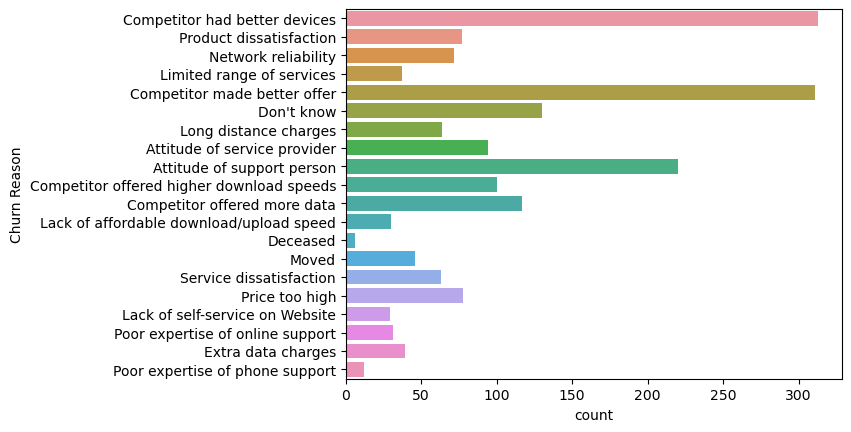

In [34]:
sns.countplot(y = df['Churn Reason'], data = df) #indepth reviews

In [35]:
df[df['Churn Category']=='Competitor'].Offer.value_counts() # most of them got no offer or Offer E , where churing rate is very high with this offer

None       467
Offer E    201
Offer D     62
Offer B     47
Offer C     44
Offer A     20
Name: Offer, dtype: int64

In [36]:
df[df['Churn Category']=='Competitor'].Contract.value_counts() #Majority is  Month-to-Month

Month-to-Month    748
One Year           69
Two Year           24
Name: Contract, dtype: int64

In [37]:

df_comp = df[df['Churn Category']=='Competitor']
df_comp.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,year_tenure,Age Group
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices,0,40-60
19,Male,67,No,0,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer,0,60+
40,Male,69,No,0,0,2,None,Yes,43.99,No,Yes,DSL,27.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,49.25,91.10,0.0,0,87.98,179.08,Churned,Competitor,Competitor made better offer,0,60+
53,Male,51,No,0,0,40,None,Yes,37.69,Yes,Yes,Fiber Optic,15.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,104.50,4036.85,0.0,0,1507.60,5544.45,Churned,Competitor,Competitor had better devices,3,40-60
64,Male,59,No,0,0,1,None,Yes,40.71,Yes,Yes,Fiber Optic,25.0,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.75,99.75,0.0,0,40.71,140.46,Churned,Competitor,Competitor had better devices,0,40-60


In [38]:
df_comp[df_comp['Offer'] =='Offer A']['Contract'].value_counts()  #these are the Customer who got best offer and still churing 
#in month to month contract its likely they are lifestyle churners


One Year          8
Two Year          7
Month-to-Month    5
Name: Contract, dtype: int64

In [39]:
df['error'] = df['Total Charges']-((df['Monthly Charge'])*(df['Tenure in Months']))
df[df['Phone Service']=="No"] #There is diff in Total charges and (monthy*Tenure)- if the error is +ve it's more likely they have reduced their sevices(which is 
#also regarded as service churn)
#and if it's negative they might have upgraded their services .

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,year_tenure,Age Group,error
10,Male,47,No,0,0,54,None,No,NaN,NaN,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,0.0,0,0.0,2460.55,Stayed,NaN,NaN,4,40-60,19.75
14,Female,39,No,0,0,56,None,No,NaN,NaN,Yes,DSL,19.0,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,45.05,2560.10,0.0,0,0.0,2560.10,Stayed,NaN,NaN,4,20-40,37.30
16,Female,52,Yes,1,0,34,None,No,NaN,NaN,Yes,DSL,20.0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,61.25,1993.20,0.0,0,0.0,1993.20,Stayed,NaN,NaN,2,40-60,-89.30
19,Male,67,No,0,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.0,0,0.0,25.10,Churned,Competitor,Competitor made better offer,0,60+,0.00
25,Female,37,Yes,1,1,1,None,No,NaN,NaN,Yes,DSL,19.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.50,30.50,0.0,0,0.0,30.50,Churned,Attitude,Attitude of service provider,0,20-40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Female,75,No,0,0,65,Offer B,No,NaN,NaN,Yes,Cable,9.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,53.50,3517.90,0.0,0,0.0,3517.90,Stayed,NaN,NaN,5,60+,40.40
6980,Female,69,No,0,0,1,Offer E,No,NaN,NaN,Yes,DSL,21.0,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,25.05,25.05,0.0,0,0.0,25.05,Churned,Competitor,Competitor had better devices,0,60+,0.00
6996,Female,58,No,0,0,12,Offer D,No,NaN,NaN,Yes,DSL,7.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,49.85,552.10,0.0,0,0.0,552.10,Stayed,NaN,NaN,1,40-60,-46.10
7016,Male,23,Yes,0,7,69,None,No,NaN,NaN,Yes,DSL,42.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,60.80,4263.40,0.0,0,0.0,4263.40,Stayed,NaN,NaN,5,20-40,68.20


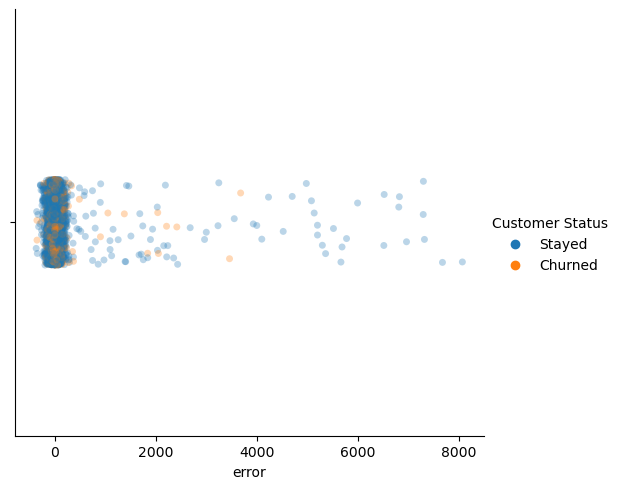

In [40]:

sns.catplot(x ='error', hue = 'Customer Status' , data = df, alpha = 0.3) 

In [41]:
df_reducedS=df[df['error']>0]
df_reducedS

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,year_tenure,Age Group,error
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,0,20-40,2.90
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,0,40-60,578.40
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,0,60+,15.70
6,Female,67,Yes,0,1,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,14.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN,5,60+,115.55
7,Male,52,Yes,0,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,7.0,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN,5,40-60,44.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,Male,72,Yes,1,1,47,None,Yes,42.29,No,Yes,Fiber Optic,22.0,No,Yes,No,No,Yes,No,No,No,One Year,Yes,Bank Withdrawal,84.95,4018.05,0.00,80,1987.63,6085.68,Stayed,NaN,NaN,3,60+,25.40
7037,Female,36,No,0,0,4,None,Yes,2.01,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned,Competitor,Competitor made better offer,0,20-40,1.70
7038,Female,20,No,0,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN,1,0-20,25.95
7039,Male,40,Yes,0,1,22,Offer D,Yes,16.20,Yes,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,1,20-40,1.50


In [42]:
df_reducedS=df[df['error']>0] #No such difference in Churning Pattern

print("Those reduced their services",df_reducedS['Customer Status'].value_counts())
df_increasedS=df[df['error']<0]
print("Those who increased their services",df_increasedS['Customer Status'].value_counts())

Those reduced their services Stayed     2408
Churned     760
Name: Customer Status, dtype: int64
Those who increased their services Stayed     2302
Churned     738
Name: Customer Status, dtype: int64


<Axes: xlabel='Monthly Charge', ylabel='Density'>

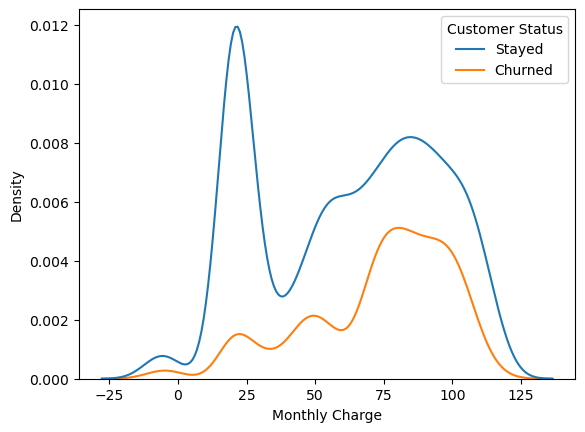

In [43]:
sns.kdeplot(x = 'Monthly Charge',data = df, hue='Customer Status') #churning is high with monthly charg between 50 and 120

<Axes: xlabel='Total Charges', ylabel='Density'>

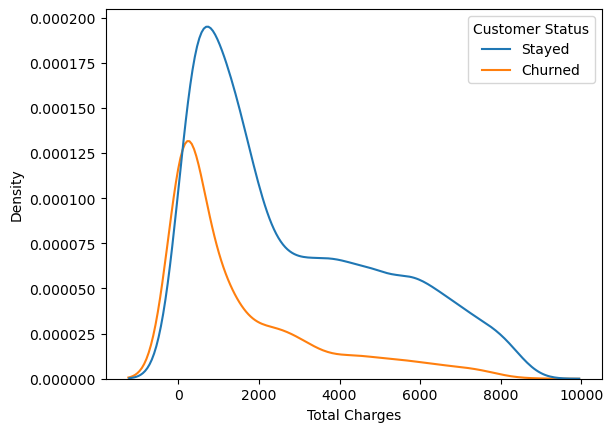

In [44]:
sns.kdeplot(x = 'Total Charges', data = df, hue = 'Customer Status') #here we observed churning is high when Total charges are less 

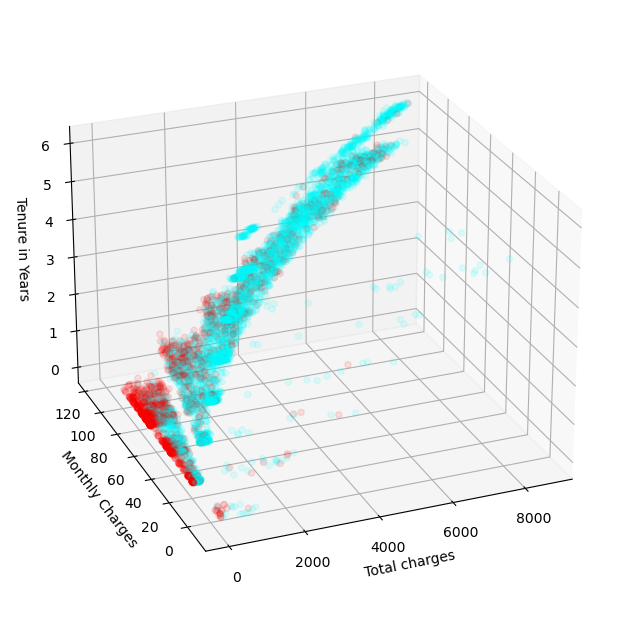

In [45]:
#we will consider tenure here, as we assumed Total charges = Monthly charges* tenure. We will see 3D plot to see the relationship 
color = {'Stayed':'cyan', 'Churned': 'red'}
df['colors']= df['Customer Status'].map(color)
fig = plt.figure(1, figsize=(9, 6))
ax = Axes3D(fig,azim=-112,elev=25 ,auto_add_to_figure=False) 
ax.scatter(df['Total Charges'], df['Monthly Charge'], df['year_tenure'], c = df['colors'],alpha=0.1)
fig.add_axes(ax)
ax.set_xlabel('Total charges')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Tenure in Years')


plt.show() #We observed churn rate is higher when customer have monthly charges more than ~30 and tenure less than a year are high risk of churning 


<Axes: xlabel='Phone Service,Internet Service'>

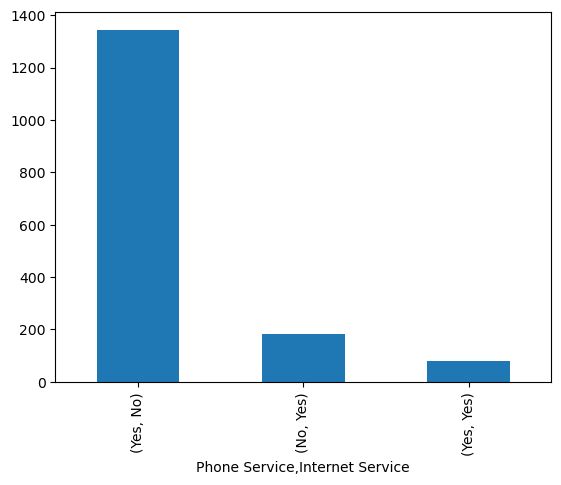

In [46]:
df[df['Monthly Charge']<35][[ 'Phone Service','Internet Service']].value_counts().plot(kind = 'bar') #mostly people took phone service

<Axes: xlabel='Phone Service,Internet Service'>

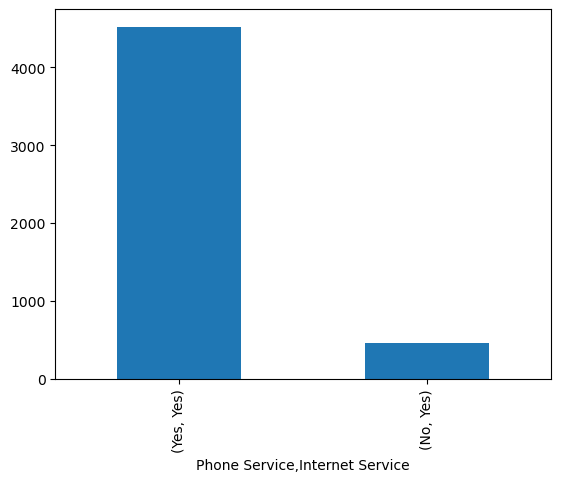

In [47]:
df[df['Monthly Charge']>35][[ 'Phone Service','Internet Service']].value_counts().plot(kind = 'bar')

<Axes: xlabel='Phone Service,Internet Service'>

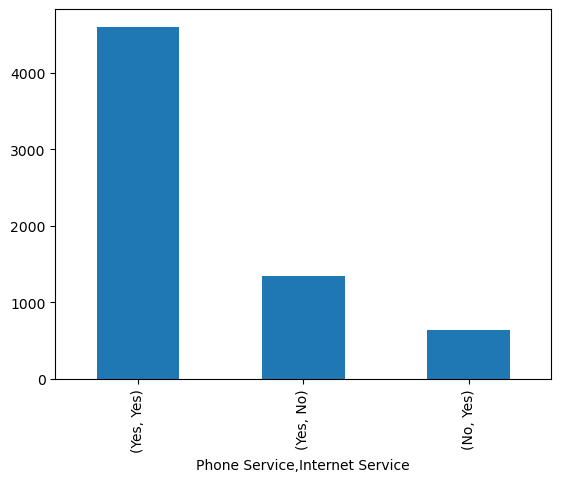

In [48]:
df[['Phone Service','Internet Service']].value_counts().plot(kind = 'bar') #number of customer took both services , most of them took both

Text(0.5, 0, 'year_tenure')

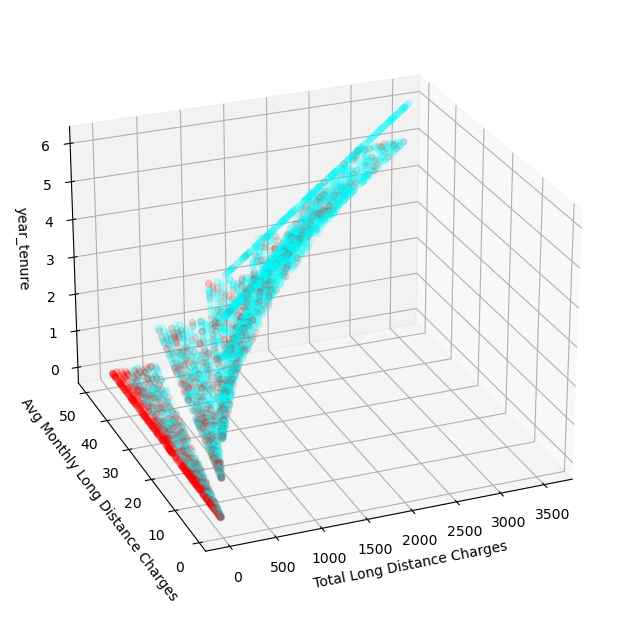

In [49]:
color = {'Stayed':'cyan', 'Churned': 'red'} #Relationship between the three as Total long distance Charges = Avg Monthly Long distance/Tenure in Months
df['colors']= df['Customer Status'].map(color) 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(9, 6))

ax = Axes3D(fig,azim=-112,elev=25, auto_add_to_figure=False) 
ax.scatter(df['Total Long Distance Charges'], df['Avg Monthly Long Distance Charges'], df['year_tenure'], c = df['colors'],alpha=0.1)
fig.add_axes(ax)
ax.set_xlabel('Total Long Distance Charges')
ax.set_ylabel('Avg Monthly Long Distance Charges')
ax.set_zlabel('year_tenure')

In [50]:
pivot_Revenue = pd.pivot_table(df, 
                             values=['Total Revenue', 'Monthly Charge'], 
                             index='Customer Status', 
                             aggfunc={'Total Revenue': 'sum', 'Monthly Charge': 'mean'})

# Calculate Total Revenue percentage against Customer Status
pivot_Revenue['Total Revenue %'] = (pivot_Revenue['Total Revenue'] / pivot_Revenue['Total Revenue'].sum()) * 100

# result of Pivot
print(pivot_Revenue) #17.28% Revenue is generated by Churned customers

                 Monthly Charge  Total Revenue  Total Revenue %
Customer Status                                                
Churned               73.347592     3684459.82        17.284259
Stayed                61.737415    17632392.12        82.715741


In [51]:
df['Total Revenue'].sum() #Total revenue generated after the end of Q2 2022

21316851.94

In [52]:
pivot_contract = pd.pivot_table(df, index='Customer Status', columns = 'Contract', values='Total Revenue', aggfunc=sum)
print(pivot_contract) #Total Revenue generated based on Contract

Contract         Month-to-Month    One Year    Two Year
Customer Status                                        
Churned              2490105.85   858489.80   335864.17
Stayed               3624632.63  5310525.05  8697234.44


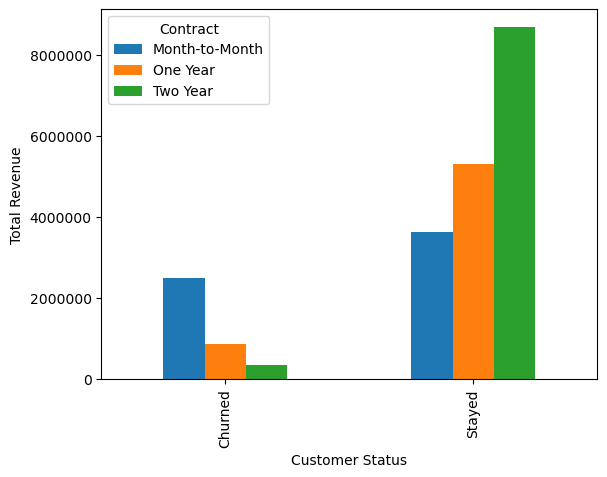

In [53]:
pivot_contract.plot(kind = 'bar') #Maximum Revenue generated by Churned is by "Month to month Contract" and 'Two years' for those who' Stayed
plt.ylabel("Total Revenue")
plt.ticklabel_format(style='plain', axis='y')

In [54]:
total=(pivot_contract['Month-to-Month']+pivot_contract['One Year']+pivot_contract['Two Year'])
pivot_contract_ = pd.DataFrame()
pivot_contract['Month-to-Month Revenue %']=(pivot_contract['Month-to-Month']*100/total)
pivot_contract['One Year %']=(pivot_contract['One Year']*100/total)
pivot_contract['Two Year %']=(pivot_contract['Two Year']*100/total) #Added percantage Revenue of each type of contract
pivot_contract

Contract,Month-to-Month,One Year,Two Year,Month-to-Month Revenue %,One Year %,Two Year %
Customer Status,,,,,,
Churned,2490105.85,858489.80,335864.17,67.584014,23.300289,9.115696
Stayed,3624632.63,5310525.05,8697234.44,20.556670,30.118007,49.325323


In [55]:
y =pd.crosstab(df['Contract'], df['Customer Status'])
y['Churn_rate'] = (y.values[:,0] /(y.values[:,0]+y.values[:,1]))*100
y['Total'] = y.values[:,0]+y.values[:,1]
y['Total_Churn'] = sum(y.values[:,0])
y['Total%'] = (y.Total/sum(y.Total))*100
y['Churn%'] = (y.values[:,0]/y['Total_Churn'])*100
y #Chuned percentage by contract

Customer Status,Churned,Stayed,Churn_rate,Total,Total_Churn,Total%,Churn%
Contract,,,,,,,
Month-to-Month,1655,1547,51.686446,3202.0,1869.0,48.596145,88.550027
One Year,166,1360,10.878113,1526.0,1869.0,23.159812,8.881755
Two Year,48,1813,2.579258,1861.0,1869.0,28.244043,2.568218


<Axes: >

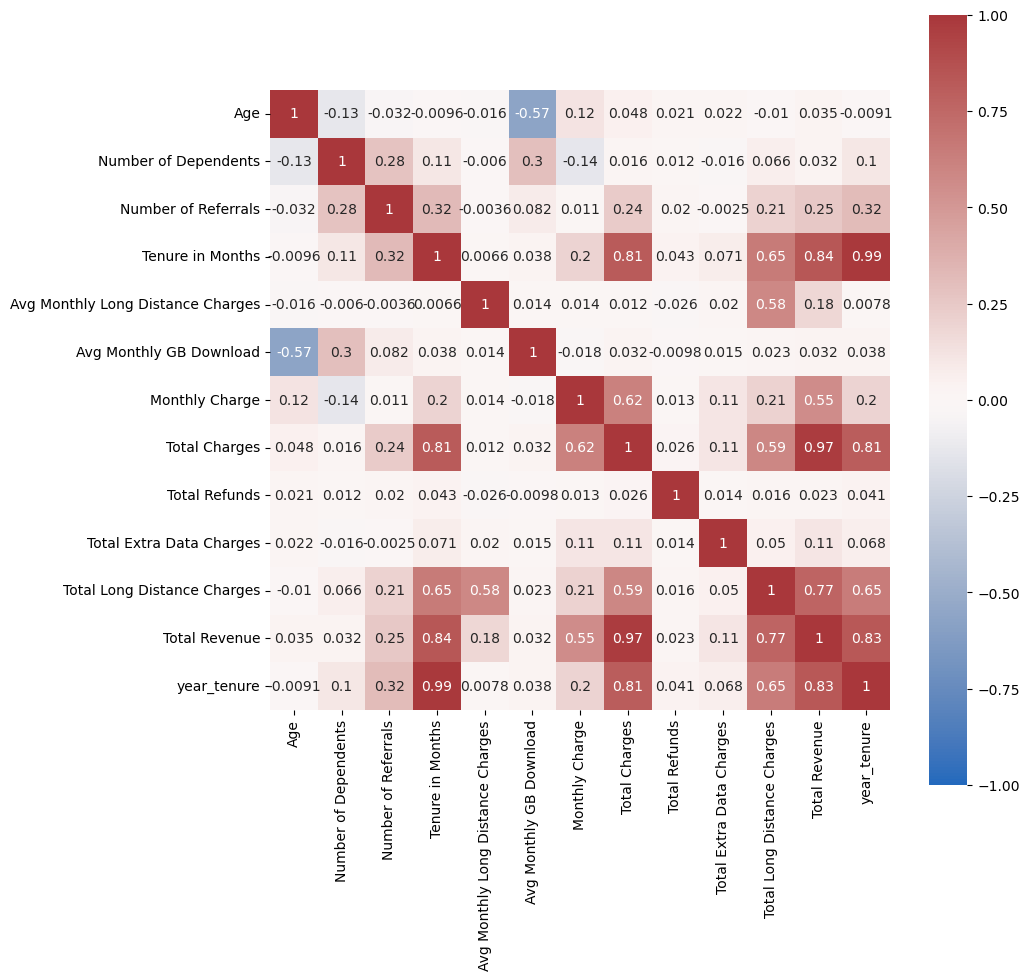

In [56]:
corr = df[num_col].corr() #Correlation heatmap, will be using this for feature selection and observing which features are more corrletaed
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot= True, vmin=-1, vmax=1, cmap = 'vlag', square= True)

In [57]:
########********************* Data Preparation**********************##########`

In [58]:
#check duplicates
df.duplicated().sum() #No dupicate items

0

In [59]:
#Handing Null values
df.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                       0
Payment Method                    

<Axes: >

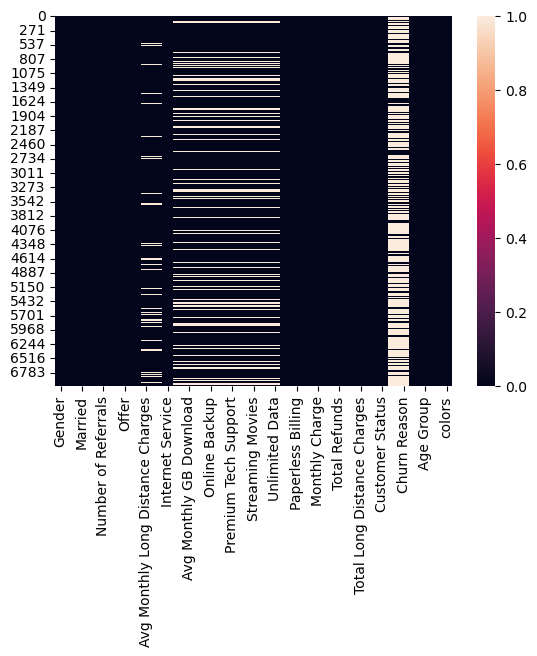

In [60]:
sns.heatmap(df.isna()) #Avg Monthly GB Download, Online Security,Online Backup,Device Protection Plan,Premium Tech Support,
#Streaming TV, Streaming Movies,Streaming Music,Unlimited Data) These are null at same index of rows.

In [61]:
#These are all related to  Internet services, we will check those
df[df['Internet Service']=='Yes'].isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [62]:
df[df['Internet Service']=='No'].isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                       0
Payment Method                    

In [63]:
#These are null where customers have not taken Internet services so we will impute this with No
Internet_services = ['Avg Monthly GB Download','Online Security','Online Backup','Device Protection Plan','Premium Tech Support',
'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data', 'Internet Type'] #internet services

In [64]:
for col in Internet_services:
    print(col, df[col].unique())

Avg Monthly GB Download [16. 10. 30.  4. 11. 73. 14.  7. 21. 59. 19. 12. 20. 17.  9. nan 52. 57.
 51. 41. 22. 23. 27.  2. 69. 53. 15. 29. 85. 28. 18. 48. 25. 26.  8.  6.
  5. 13. 75. 82. 24. 76. 47. 71. 58. 42.  3. 56. 46. 39.]
Online Security ['No' 'Yes' nan]
Online Backup ['Yes' 'No' nan]
Device Protection Plan ['No' 'Yes' nan]
Premium Tech Support ['Yes' 'No' nan]
Streaming TV ['Yes' 'No' nan]
Streaming Movies ['No' 'Yes' nan]
Streaming Music ['No' 'Yes' nan]
Unlimited Data ['Yes' 'No' nan]
Internet Type ['Cable' 'Fiber Optic' 'DSL' nan]


In [65]:
services_bi = ['Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV', 
               'Streaming Movies','Streaming Music','Unlimited Data']#These are null where customers have not taken Internet services so we will impute this with "No". These have binary outcome

In [66]:
for col in services_bi:
    df[col] = df[col].fillna("No")
print(df.isna().sum()) 

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [67]:
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(0) #Numerical with 0
df['Internet Type'] = df['Internet Type'].fillna("Not applicable") #Multi category with 'Not aaplicable'

In [68]:
#Long distance charges and Multiple lines are related to Phone service, will check those
df[df['Phone Service']== 'Yes'].isna().sum() #No null values when it is yes

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [69]:
df[df['Phone Service']== 'No'].isna().sum()

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    644
Multiple Lines                       644
Internet Service                       0
Internet Type                          0
Avg Monthly GB Download                0
Online Security                        0
Online Backup                          0
Device Protection Plan                 0
Premium Tech Support                   0
Streaming TV                           0
Streaming Movies                       0
Streaming Music                        0
Unlimited Data                         0
Contract                               0
Paperless Billing                      0
Payment Method                         0
Monthly Charge  

In [70]:
df['Multiple Lines'].unique()

array(['No', 'Yes', nan], dtype=object)

In [71]:
df['Avg Monthly Long Distance Charges'].unique() #impute those with 0 and Multiple Lines with No

array([42.39, 10.69, 33.65, ..., 10.04, 25.59,  2.01])

In [72]:
df['Multiple Lines'] = df['Multiple Lines'].fillna("No")
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(0)
df.isna().sum() #We don't need Churn reason to train the model so keeping it as it is.

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [73]:
#negative values handling
(df['Monthly Charge']<0).sum() #Monthly charge have negative values checked from descrptive statistics(minimum values)

114

In [74]:
#Total Charges = Monthly Charge *  Tenure in Months
#Monthly charges = Total Charges /Tenure in Months, not accurate but better than mean or median
df['Monthly Charge'] = np.where(df['Monthly Charge'] < 0, df['Total Charges']/df['Tenure in Months'] , df['Monthly Charge'])

In [75]:
(df['Monthly Charge']<0).sum()

0

In [76]:
#***********Feature selection and Hypothesis Testing****************
#We will do hypothesis testing to check if there is any difference between Customer who are churning and who are not
#Annova testing for Numerical features and chi square test for categorical features

In [77]:
#chi test for categorica values

In [78]:
list1 = [] #to store p_value
list2 = [] # to store column name

for col in cat_col: #Gender, 'Phone service' shows no diff. rest all shows diff , we can consider those while feature selection
    df_tab = pd.crosstab(df[col], df['Customer Status'])
    values_array = df_tab.values
    chi_test = chi2_contingency(values_array)
    p_value = chi_test.pvalue
    if p_value < 0.05:
        print( "Reject null hypothesis for", col)
        list1.append(p_value)
        list2.append(col)
    else:
        print("Accept the null hypothesis for", col)

Accept the null hypothesis for Gender
Reject null hypothesis for Married
Reject null hypothesis for Offer
Accept the null hypothesis for Phone Service
Accept the null hypothesis for Multiple Lines
Reject null hypothesis for Internet Service
Reject null hypothesis for Internet Type
Reject null hypothesis for Online Security
Reject null hypothesis for Online Backup
Reject null hypothesis for Device Protection Plan
Reject null hypothesis for Premium Tech Support
Reject null hypothesis for Streaming TV
Reject null hypothesis for Streaming Movies
Reject null hypothesis for Streaming Music
Reject null hypothesis for Unlimited Data
Reject null hypothesis for Contract
Reject null hypothesis for Paperless Billing
Reject null hypothesis for Payment Method
Reject null hypothesis for Customer Status
Accept the null hypothesis for Churn Category
Accept the null hypothesis for Churn Reason
Reject null hypothesis for Age Group


In [79]:
score_cat = pd.DataFrame(list1, columns=['p_values'])
score_cat

,p_values
0,7.014602e-50
1,2.156619e-151
2,1.098938e-73
3,1.192022e-127
4,5.689634e-56
5,1.247917e-17
6,5.150261e-14
7,2.580291e-52
8,9.090825e-04
9,1.687471e-03


In [80]:
score_cat['features'] = list2
score_cat.sort_values(by= 'p_values') # Contract and Offer have more weightage for difference in churn category

,p_values,features
15,0.000000e+00,Customer Status
12,0.000000e+00,Contract
1,2.156619e-151,Offer
3,1.192022e-127,Internet Type
2,1.098938e-73,Internet Service
14,1.556102e-70,Payment Method
4,5.689634e-56,Online Security
7,2.580291e-52,Premium Tech Support
13,3.112345e-52,Paperless Billing
0,7.014602e-50,Married


In [81]:
#Numerical data hypothesis testing - Annova test

In [82]:
num_best = SelectKBest(score_func=f_classif, k = 'all')

In [83]:
num_best.fit(df[num_col], df['Customer Status'])

SelectKBest(k='all')

In [84]:
pvalues = num_best.pvalues_
pvalues

array([1.42152733e-019, 1.31714812e-081, 7.82822492e-149, 1.65689666e-300,
       5.89587527e-001, 1.14369115e-003, 3.17240030e-045, 1.68482447e-094,
       4.09218052e-004, 9.83234798e-001, 3.96420006e-109, 9.07890396e-118,
       1.73036938e-269])

In [85]:
score_num= num_best.scores_
score_num

array([8.24315415e+01, 3.76502505e+02, 7.10948463e+02, 1.52653535e+03,
       2.91017400e-01, 1.05884723e+01, 2.02225229e+02, 4.39400451e+02,
       1.25024243e+01, 4.41605386e-04, 5.11477247e+02, 5.54405346e+02,
       1.35259717e+03])

In [86]:
df_score = pd.DataFrame(pvalues, columns=['P_value'])
df_score

,P_value
0,1.421527e-19
1,1.317148e-81
2,7.828225e-149
3,1.656897e-300
4,5.895875e-01
5,1.143691e-03
6,3.172400e-45
7,1.684824e-94
8,4.092181e-04
9,9.832348e-01


In [87]:
df_score['score'] = score_num 

In [88]:
df_score['feature'] = num_col

In [89]:
df_score.sort_values(by = 'P_value') #highest score is Tenure in month , we will consider Tenure in Months, Number of Referrals,
#Total Revenue(this is highly correlated with other features too)

,P_value,score,feature
3,1.656897e-300,1526.535347,Tenure in Months
12,1.730369e-269,1352.597169,year_tenure
2,7.828225e-149,710.948463,Number of Referrals
11,9.078904e-118,554.405346,Total Revenue
10,3.964200e-109,511.477247,Total Long Distance Charges
7,1.684824e-94,439.400451,Total Charges
1,1.317148e-81,376.502505,Number of Dependents
6,3.172400e-45,202.225229,Monthly Charge
0,1.421527e-19,82.431541,Age
8,4.092181e-04,12.502424,Total Refunds


In [90]:
p_val =df_score[df_score['P_value'] <0.05] #All are less than 0.05 (reject null hypothesis) except two/
#Customer who churned and who did not.
p_val.sort_values(by = 'P_value')

,P_value,score,feature
3,1.656897e-300,1526.535347,Tenure in Months
12,1.730369e-269,1352.597169,year_tenure
2,7.828225e-149,710.948463,Number of Referrals
11,9.078904e-118,554.405346,Total Revenue
10,3.964200e-109,511.477247,Total Long Distance Charges
7,1.684824e-94,439.400451,Total Charges
1,1.317148e-81,376.502505,Number of Dependents
6,3.172400e-45,202.225229,Monthly Charge
0,1.421527e-19,82.431541,Age
8,4.092181e-04,12.502424,Total Refunds


In [91]:
#df1 = df.drop(['Churn Category','Churn Reason', 'year_tenure', 'error','Gender', ------These were iterated considering hypothesis, EDA and feature importance
            # 'Streaming TV','Streaming Movies','Streaming Music', 'Age Group', 'Avg Monthly Long Distance Charges',
              # 'Total Extra Data Charges', 'Phone Service','Multiple Lines', 'colors','Internet Type','Premium Tech Support','Device Protection Plan','Total Charges'],axis = 1 )
df1 = df.drop(['Churn Category','Churn Reason', 'year_tenure', 'error','Gender',
             'Streaming TV','Streaming Movies','Streaming Music', 'Age Group', 'Avg Monthly Long Distance Charges',
               'Total Extra Data Charges', 'Phone Service','Multiple Lines', 'colors','Internet Type','Total Charges','Device Protection Plan','Premium Tech Support'],axis = 1 )

In [92]:
df1.head()

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Long Distance Charges,Total Revenue,Customer Status
0,37,Yes,0,2,9,None,Yes,16.0,No,Yes,Yes,One Year,Yes,Credit Card,65.600000,0.00,381.51,974.81,Stayed
1,46,No,0,0,9,None,Yes,10.0,No,No,No,Month-to-Month,No,Credit Card,60.266667,38.33,96.21,610.28,Stayed
2,50,No,0,0,4,Offer E,Yes,30.0,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900000,0.00,134.60,415.45,Churned
3,78,Yes,0,1,13,Offer D,Yes,4.0,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000000,0.00,361.66,1599.51,Churned
4,75,Yes,0,3,3,None,Yes,11.0,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900000,0.00,22.14,289.54,Churned


In [93]:
#**************Encoding categorical features and feature Engineering*************************

In [94]:
dict = {'Stayed': 0, 'Churned': 1} #mapped numerical values by Stating Churned as 1 and Stayed as 0
df1['Customer Status'] = df1['Customer Status'].map(dict)
df1.head()

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Long Distance Charges,Total Revenue,Customer Status
0,37,Yes,0,2,9,None,Yes,16.0,No,Yes,Yes,One Year,Yes,Credit Card,65.600000,0.00,381.51,974.81,0
1,46,No,0,0,9,None,Yes,10.0,No,No,No,Month-to-Month,No,Credit Card,60.266667,38.33,96.21,610.28,0
2,50,No,0,0,4,Offer E,Yes,30.0,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900000,0.00,134.60,415.45,1
3,78,Yes,0,1,13,Offer D,Yes,4.0,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000000,0.00,361.66,1599.51,1
4,75,Yes,0,3,3,None,Yes,11.0,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900000,0.00,22.14,289.54,1


In [95]:
#Label encoding for binary class features

bi_col = ['Married','Internet Service','Online Security','Online Backup', 'Unlimited Data',
         'Paperless Billing', 'Unlimited Data']

In [96]:
label_encoder = LabelEncoder() #label encoding for binary categorical values

In [97]:
for col in bi_col:
    label_encoder.fit(df1[col])
    df1[col] = label_encoder.transform(df1[col])

In [98]:
df1

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Long Distance Charges,Total Revenue,Customer Status
0,37,1,0,2,9,None,1,16.0,0,1,1,One Year,1,Credit Card,65.600000,0.00,381.51,974.81,0
1,46,0,0,0,9,None,1,10.0,0,0,0,Month-to-Month,0,Credit Card,60.266667,38.33,96.21,610.28,0
2,50,0,0,0,4,Offer E,1,30.0,0,0,1,Month-to-Month,1,Bank Withdrawal,73.900000,0.00,134.60,415.45,1
3,78,1,0,1,13,Offer D,1,4.0,0,1,1,Month-to-Month,1,Bank Withdrawal,98.000000,0.00,361.66,1599.51,1
4,75,1,0,3,3,None,1,11.0,0,0,1,Month-to-Month,1,Credit Card,83.900000,0.00,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,0,0,4,None,0,0.0,0,0,0,Month-to-Month,0,Bank Withdrawal,20.950000,0.00,8.04,93.54,1
7038,20,0,0,0,13,Offer D,1,59.0,1,0,1,One Year,0,Credit Card,55.150000,0.00,606.84,1349.74,0
7039,40,1,0,1,22,Offer D,1,17.0,0,0,1,Month-to-Month,1,Bank Withdrawal,85.100000,0.00,356.40,2230.10,1
7041,21,1,0,5,67,Offer A,1,58.0,1,0,1,Two Year,0,Credit Card,67.850000,0.00,142.04,4769.69,0


In [99]:

mul_col = ['Offer','Contract','Payment Method'] #Mulitple category features

In [100]:
bi_encoder = ce.BinaryEncoder(cols = mul_col , return_df = True) #Binary encoder for multiple category features

In [101]:
df1 =bi_encoder.fit_transform(df1)
df1

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer_0,Offer_1,Offer_2,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Unlimited Data,Contract_0,Contract_1,Paperless Billing,Payment Method_0,Payment Method_1,Monthly Charge,Total Refunds,Total Long Distance Charges,Total Revenue,Customer Status
0,37,1,0,2,9,0,0,1,1,16.0,0,1,1,0,1,1,0,1,65.600000,0.00,381.51,974.81,0
1,46,0,0,0,9,0,0,1,1,10.0,0,0,0,1,0,0,0,1,60.266667,38.33,96.21,610.28,0
2,50,0,0,0,4,0,1,0,1,30.0,0,0,1,1,0,1,1,0,73.900000,0.00,134.60,415.45,1
3,78,1,0,1,13,0,1,1,1,4.0,0,1,1,1,0,1,1,0,98.000000,0.00,361.66,1599.51,1
4,75,1,0,3,3,0,0,1,1,11.0,0,0,1,1,0,1,0,1,83.900000,0.00,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,36,0,0,0,4,0,0,1,0,0.0,0,0,0,1,0,0,1,0,20.950000,0.00,8.04,93.54,1
7038,20,0,0,0,13,0,1,1,1,59.0,1,0,1,0,1,0,0,1,55.150000,0.00,606.84,1349.74,0
7039,40,1,0,1,22,0,1,1,1,17.0,0,0,1,1,0,1,1,0,85.100000,0.00,356.40,2230.10,1
7041,21,1,0,5,67,1,0,0,1,58.0,1,0,1,1,1,0,0,1,67.850000,0.00,142.04,4769.69,0


In [102]:
minmaxS = MinMaxScaler() #Minmax normalisation of numerical for better results 

In [103]:

n_col = ['Age','Monthly Charge','Total Refunds', 'Total Long Distance Charges', 'Total Revenue', 'Tenure in Months', 'Number of Referrals',
        'Avg Monthly GB Download']

In [104]:
minmaxS.fit(df1[n_col])
df1[n_col]= minmaxS.transform(df1[n_col])


In [105]:
x = df1.drop('Customer Status', axis =1) #independent variable 
y = df1['Customer Status'] #dependent variable

In [106]:
#************SPLIT DATA _TRAIN TEST****************

In [107]:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 123) #Split train test data 
#in a ratio of 80:20 for train and test respectively

In [108]:
x_train.shape, x_test.shape #Shape of data after splitting

((5271, 22), (1318, 22))

In [109]:
#******Training Model and Validation******

In [110]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 42) #hyperparameter tunning done on number of trees
# Train the model on training data
rf.fit(x_train, y_train);

In [111]:
#grid = {'max_depth':[2,3,4,5, 8,9,10] # we did no consider by grid search
        #'min_samples_split':[5, 7, 8, 10, 12, 15, 18, 20, 22], #1-40
        #'min_samples_leaf':[1,2,3,4,5,6,9,10],
        #'criterion': ['gini', 'entropy'],
       #'n_estimators':[50,100,150,200]} 

In [112]:
#rf1 = RandomForestClassifier(random_state = 42)

In [113]:
#gcv_rf= GridSearchCV(estimator= rf1 , param_grid = grid)
#gcv_rf.fit(x_train, y_train)

In [114]:
pred = rf.predict(x_test) #Predicted value

In [115]:
rf.score(x_test,y_test)  #Accuracy

0.8899848254931715

In [116]:
strat_kfold = StratifiedKFold(n_splits=5) #5 fold Cross validation


In [117]:
score= cross_val_score(rf, x_train,y_train, cv= strat_kfold)
score.mean() #Cross validationg Accuracy

0.8637813969801345

In [118]:
rf.score(x_train,y_train) #Train Accuracy

1.0

In [119]:
feature_importance =rf.feature_importances_ #Feature importance obtained by model

In [120]:
feature_importance = pd.Series(feature_importance, index = x.columns)

In [121]:
feature_importance.sort_values()

Offer_2                        0.008080
Internet Service               0.008440
Offer_1                        0.009071
Unlimited Data                 0.009903
Offer_0                        0.009906
Payment Method_1               0.010200
Total Refunds                  0.010219
Contract_0                     0.011262
Online Backup                  0.011589
Paperless Billing              0.012796
Married                        0.013867
Payment Method_0               0.014176
Online Security                0.015239
Number of Dependents           0.032781
Avg Monthly GB Download        0.064795
Number of Referrals            0.067785
Age                            0.077758
Total Long Distance Charges    0.084656
Monthly Charge                 0.102501
Total Revenue                  0.128558
Contract_1                     0.131089
Tenure in Months               0.165329
dtype: float64

Text(0, 0.5, 'Feature Importance')

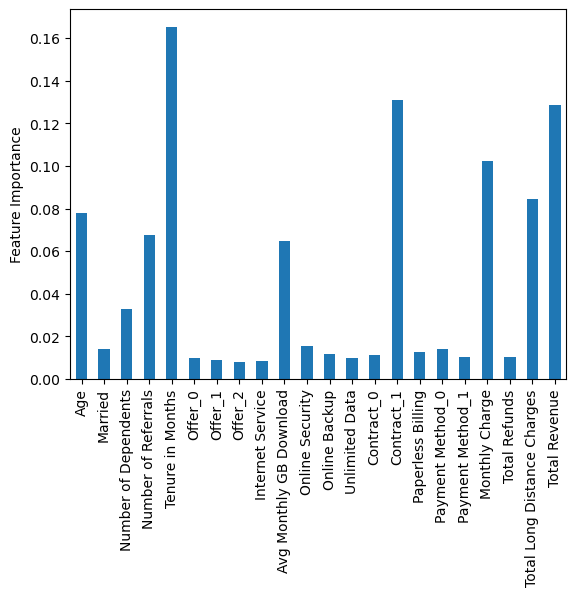

In [122]:
feature_importance.plot(kind = 'bar')
plt.ylabel("Feature Importance")

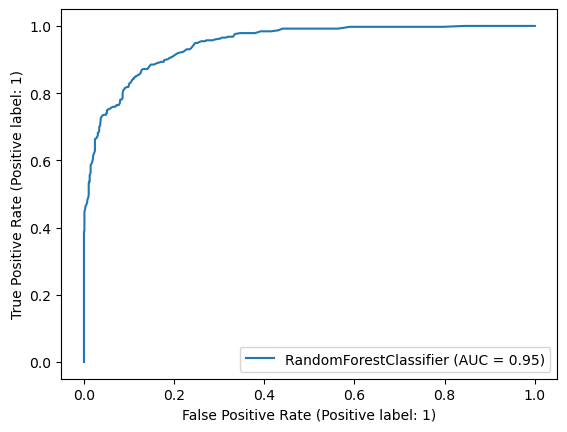

In [123]:
RocCurveDisplay.from_estimator(rf, x_test, y_test) #ROC curve for performance

In [124]:
print(classification_report(y_test, pred)) #performance parameters

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       944
           1       0.85      0.74      0.79       374

    accuracy                           0.89      1318
   macro avg       0.88      0.84      0.86      1318
weighted avg       0.89      0.89      0.89      1318



In [125]:
#************Handling imbalace data**********************

In [126]:
smt = SMOTE() #1. Using SMOTE (Synthetic over sampling technique)

In [127]:
x_train_smt, y_train_smt = smt.fit_resample(x_train,y_train)

In [128]:
y_train_smt.value_counts()#after oversampling

1    3776
0    3776
Name: Customer Status, dtype: int64

In [129]:
y_train.value_counts()#before oversampling

0    3776
1    1495
Name: Customer Status, dtype: int64

In [130]:
rf_smt = RandomForestClassifier(n_estimators = 200, random_state = 42)

rf_smt.fit(x_train_smt, y_train_smt); #Train with balanced data obtained by SMOTE

In [131]:
pred_smt = rf_smt.predict(x_test) #Predictions

In [132]:
score_smt = cross_val_score(rf_smt, x_train_smt,y_train_smt, cv= strat_kfold)
score_smt.mean() #Cross validation Score

0.8959280508062288

In [133]:
rf_smt.score(x_test,y_test) #Test Accuracy

0.8801213960546282

In [134]:
rf_smt.score(x_train,y_train) #Train Accuracy

1.0

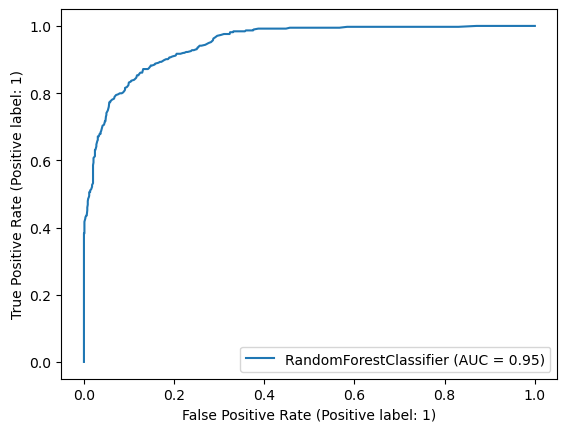

In [135]:
RocCurveDisplay.from_estimator(rf_smt, x_test, y_test) #ROC curve 

In [136]:
print(classification_report(y_test, pred_smt)) #Performance parameter obtained by balanced data using SMOTE

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       944
           1       0.77      0.82      0.79       374

    accuracy                           0.88      1318
   macro avg       0.85      0.86      0.86      1318
weighted avg       0.88      0.88      0.88      1318



In [137]:
#Balance Data with SMOTEENN - technique to balance data combining over and Under sampling (SMOTE and ENN)

In [138]:
smtn = SMOTEENN()#2. Using SMOTEENN

In [139]:
x_train_smtn, y_train_smtn = smtn.fit_resample(x_train,y_train)

In [140]:
y_train_smt.value_counts() #Balanced data after SMOTEENN

1    3776
0    3776
Name: Customer Status, dtype: int64

In [141]:
rf_smtn = RandomForestClassifier(n_estimators = 200, random_state = 42)
# Train the model on training data
rf_smtn.fit(x_train_smtn, y_train_smtn);

In [142]:
pred_smtn = rf_smtn.predict(x_test) #Predictions

In [143]:
score_smt = cross_val_score(rf_smtn, x_train_smtn,y_train_smtn, cv= strat_kfold)
score_smt.mean() #Cross validation Scores

0.9711445510356664

In [144]:
rf_smtn.score(x_test,y_test) #Test Accuracy

0.8323216995447648

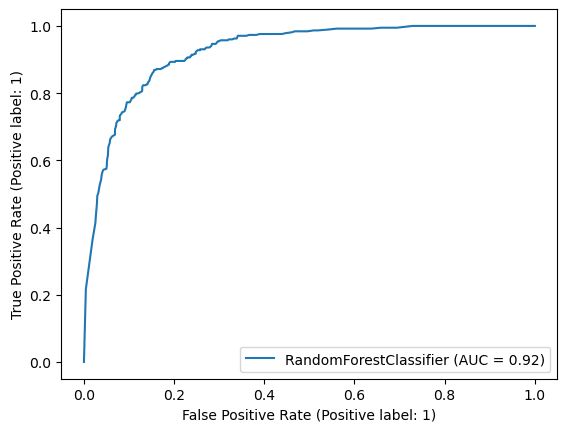

In [145]:
RocCurveDisplay.from_estimator(rf_smtn, x_test, y_test) #ROC curve

In [146]:
print(classification_report(y_test, pred_smtn)) #Performance Parameters 

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       944
           1       0.65      0.89      0.75       374

    accuracy                           0.83      1318
   macro avg       0.80      0.85      0.81      1318
weighted avg       0.86      0.83      0.84      1318



In [147]:
y_train.value_counts()

0    3776
1    1495
Name: Customer Status, dtype: int64

In [148]:
c_w = {1:8, 0:3} #3.balancing usinf weight Random Forest
rf_wrf = RandomForestClassifier(n_estimators = 200, random_state = 42, class_weight=c_w)

In [149]:
#Sample weights # We did no use this as it was reducting the Accuracy in our case
#s_w = []
#for s in y_train:
    #s_w.append(c_w[s])
    
    

In [150]:
rf_wrf.fit(x_train, y_train); #Traing model

In [151]:
#rf_wrf.fit(x_train, y_train, sample_weight=s_w); ---- did not use this

In [152]:
pred_wrf = rf_wrf.predict(x_test) #Predictions 

In [153]:
score_wrf = cross_val_score(rf_wrf,x_train, y_train, cv= strat_kfold)
score_wrf.mean() #Cross validation results 

0.8643497576373464

In [154]:
rf_wrf.score(x_test,y_test) #Test Accuracy

0.8892261001517451

In [155]:
rf_wrf.score(x_train,y_train) #TRain Accuracy

1.0

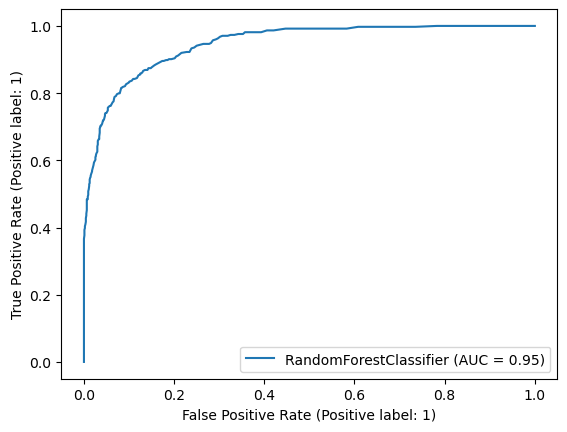

In [156]:
RocCurveDisplay.from_estimator(rf_wrf, x_test, y_test) #ROC for performance

In [157]:
print(classification_report(y_test, pred_wrf)) #Perfromance Parameters

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       944
           1       0.87      0.72      0.79       374

    accuracy                           0.89      1318
   macro avg       0.88      0.84      0.86      1318
weighted avg       0.89      0.89      0.89      1318



In [158]:
cm = confusion_matrix(y_test, pred) #Confusion matrix for all three cases
print(cm)
cm_smt= confusion_matrix(y_test, pred_smt)
print(cm_smt)
cm_smtn= confusion_matrix(y_test, pred_smtn)
print(cm_smtn)
cm_wrf= confusion_matrix(y_test, pred_wrf)
print(cm_wrf)

[[896  48]
 [ 97 277]]
[[854  90]
 [ 68 306]]
[[763 181]
 [ 40 334]]
[[903  41]
 [105 269]]


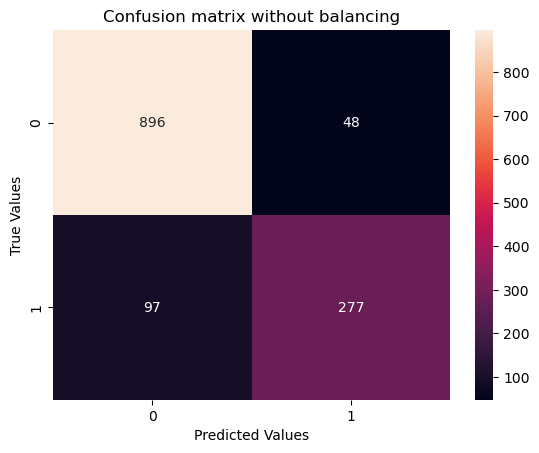

Accuracy: 0.8899848254931715
Precsion: 0.8523076923076923
Recall: 0.7406417112299465
F1 Score: 0.7925608011444921


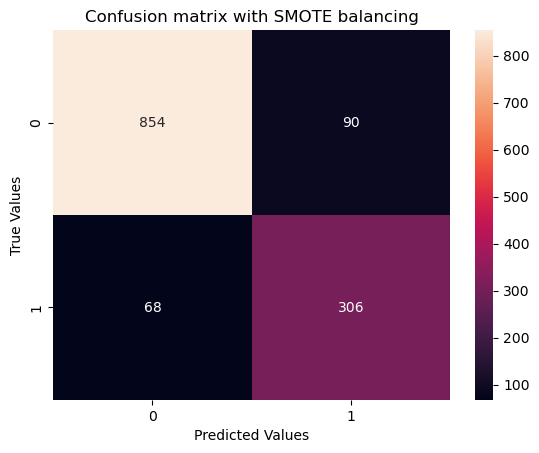

Accuracy: 0.8801213960546282
Precsion: 0.7727272727272727
Recall: 0.8181818181818182
F1 Score: 0.7948051948051948


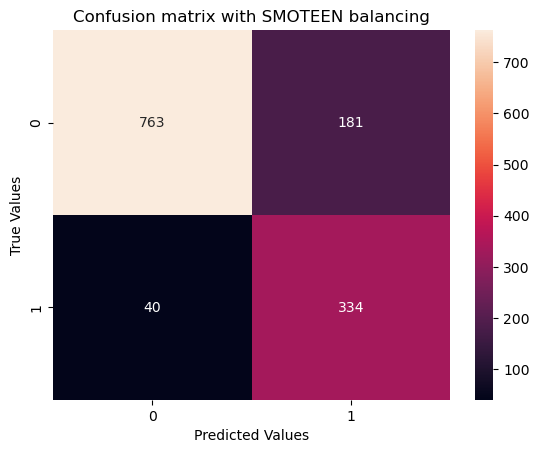

Accuracy: 0.8323216995447648
Precsion: 0.6485436893203883
Recall: 0.893048128342246
F1 Score: 0.7514060742407198


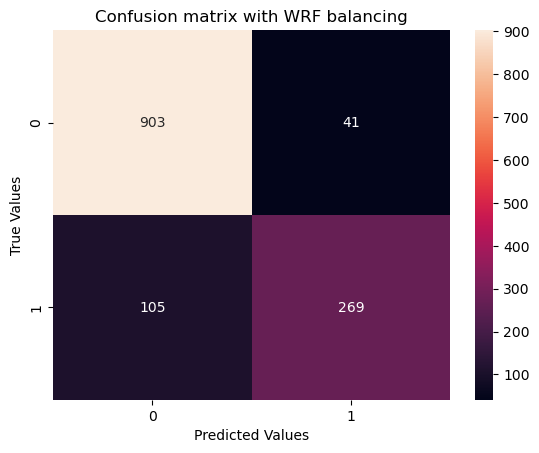

Accuracy: 0.8892261001517451
Precsion: 0.867741935483871
Recall: 0.7192513368983957
F1 Score: 0.7865497076023392


In [159]:
#Heatmap of confusion matrix  and their performance parameters, We are considering SMOTEENN , as it gives better 
#results with Type 2 error bu consdiering loss

sns.heatmap(cm, annot = True,fmt='d')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion matrix without balancing')
plt.show()
print("Accuracy:",accuracy_score(y_test, pred))
print("Precsion:",precision_score(y_test, pred))
print("Recall:",recall_score(y_test, pred))
print('F1 Score:', f1_score(y_test, pred))
sns.heatmap(cm_smt, annot = True, fmt='d')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion matrix with SMOTE balancing')
plt.show()
print("Accuracy:",accuracy_score(y_test, pred_smt))
print("Precsion:",precision_score(y_test, pred_smt))
print("Recall:",recall_score(y_test, pred_smt))
print('F1 Score:', f1_score(y_test, pred_smt))
sns.heatmap(cm_smtn, annot = True, fmt='d')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion matrix with SMOTEEN balancing')
plt.show()
print("Accuracy:",accuracy_score(y_test, pred_smtn))
print("Precsion:",precision_score(y_test, pred_smtn))
print("Recall:",recall_score(y_test, pred_smtn))
print('F1 Score:', f1_score(y_test, pred_smtn))
sns.heatmap(cm_wrf, annot = True, fmt='d')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('Confusion matrix with WRF balancing')
plt.show()
print("Accuracy:",accuracy_score(y_test, pred_wrf))
print("Precsion:",precision_score(y_test, pred_wrf))
print("Recall:",recall_score(y_test, pred_wrf))
print('F1 Score:', f1_score(y_test, pred_wrf))

In [160]:
#******************END************************